# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Frodewin Grimbert]
- **Email:** [frodewing@gmail.com]
- **ID Dicoding:** [frodewin_grimbert]

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara penilaian produk terhadap pemesanan produk tersebut?
- Daerah apa saja yang paling banyak melakukan pemesanan produk selama satu tahun terakhir (Geospatial analysis)?
- Bagaimana pengaruh lama pengiriman dengan penilaian produk?
- Tipe pembayaran apa yang paling banyak digunakan oleh pelanggan dalam melakukan transaksi?
- Tipe pembayaran mana yang menghasilkan total nilai pesanan tertinggi dari pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.ticker as mtick

## Data Wrangling

### Gathering Data

In [2]:
# mengambil data customers
customers_df = pd.read_csv('C:/Users/DELL/OneDrive/Dokumen/Frodewin/submission-dicoding-analysis_python/E-Commerce Public Dataset/customers_dataset.csv')
customers_df.sort_values(by='customer_id',ascending=True).head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
84790,00012a2ce6f8dcda20d059ce98491703,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP
27335,000161a058600d5901f007fab4c27140,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG
63792,0001fd6190edaaf884bcaf3d49edf079,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES
97756,0002414f95344307404f0ace7a26f1d5,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG
59921,000379cdec625522490c315e70c7a9fb,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP


In [3]:
# mengambil data penilaian customers
reviews_df = pd.read_csv('C:/Users/DELL/OneDrive/Dokumen/Frodewin/submission-dicoding-analysis_python/E-Commerce Public Dataset/order_reviews_dataset.csv')
reviews_df.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [4]:
# mengambil data pesanan
orders_df = pd.read_csv('C:/Users/DELL/OneDrive/Dokumen/Frodewin/submission-dicoding-analysis_python/E-Commerce Public Dataset/orders_dataset.csv')
orders_df.sort_values(by='customer_id',ascending=True).head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
68578,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04 00:00:00
10013,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04 00:00:00
65884,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22 00:00:00
43174,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14 00:00:00
5888,0ab7fb08086d4af9141453c91878ed7a,000379cdec625522490c315e70c7a9fb,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18 00:00:00


In [5]:
#mengambil data barang pesanan
order_items_df = pd.read_csv('C:/Users/DELL/OneDrive/Dokumen/Frodewin/submission-dicoding-analysis_python/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
# mengambil data produk
products_df = pd.read_csv('C:/Users/DELL/OneDrive/Dokumen/Frodewin/submission-dicoding-analysis_python/E-Commerce Public Dataset/products_dataset.csv')
products_df.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
# mengambil data pembayaran
payments_df = pd.read_csv('C:/Users/DELL/OneDrive/Dokumen/Frodewin/submission-dicoding-analysis_python/E-Commerce Public Dataset/order_payments_dataset.csv')
payments_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Total ada 6 data tabel yang diperlukan untuk menjawab pertanyaan analisis
- Tipe data ada yang berbentuk object, int, float, maupun tanggal
- Ditemukan beberapa data yang hilang ("NaN") pada tabel review_df pada lima awal data pertama
- Nilai data pada tabel **product_df** dan kolom "payment_value" pada **payment_df** berbentuk float, sisanya adalah data berbentuk int
- Ada sedikit typo pada kolom tabel **product_df**

### Assessing Data

In [8]:
# menilai data customers
customers_df.info()
print(f"\njumlah missing value\n{customers_df.isna().sum()}")
print("\nJumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

jumlah missing value
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Perintah **describe** hanya menampilkan kolom **customer_zip_code_prefix** karena dari tabel **customers_df** data numerik (int) hanya pada kolom tersebut, sisanya adalah object, sehingga perintah hanya menampilkan kolom itu.
- Data di atas tidak menunjukkan adanya kesalahan data, baik dari segi jenis data, *missing value*, duplikasi data, maupun parameter statistiknya
- Total jumlah baris dalam data **customer_df** berjumlah 99441 baris

In [9]:
# menilai data penilaian customers
reviews_df.info()
print(f"\njumlah missing value\n{reviews_df.isna().sum()}")
print("\nJumlah duplikasi: ", reviews_df.duplicated().sum())
reviews_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

jumlah missing value
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- Kolom **review_comment_title** dan **review_comment_message** memiliki data hilang. Ini terjadi karena tidak semua konsumen memberikan komen tertulis setelah pembelian dilakukan yang mungkin tidak diwajibkan oleh sistem untuk mengisi bagian judul dan pesan dari ulasan.
- Karena fokus pada pertanyaan analisis adalah nilai numerik dari ulasan (*review*) dan mungkin sedikit melihat tren dari rata-rata pemberian ulasan per periode tertentu, maka diputuskan untuk membuang kolom sisanya, yaitu kolom **review_comment_title**,**review_comment_message**,dan **review_creation_date**
- Perintah **describe** hanya menampilkan kolom **review_score** karena dari tabel **reviews_df** data numerik (int) hanya pada kolom tersebut, sisanya adalah object, sehingga perintah hanya menampilkan kolom itu.
- Data di atas tidak menunjukkan adanya kesalahan data, baik dari segi jenis data, *missing value*, duplikasi data, maupun parameter statistiknya
- Total jumlah baris dalam data **reviews_df** berjumlah 99224 baris, 217 baris lebih sedikit dari **customers_df**
- bentuk kolom **review_answer_timestamp** masih berbentuk object, belum diubah menjadi datetime

In [10]:
# menilai data pesanan
orders_df.info()
print(f"\njumlah missing value\n{orders_df.isna().sum()}")
print("\nJumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

# melihat kategori status pesanan
print(orders_df["order_status"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

jumlah missing value
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delive

**Insight:**
- Semua data diatas berbentuk tipe data object
- Data di atas menunjukkan adanya *missing value* pada kolom **order_approved_at**, **order_delivered_carrier_date**, dan **order_delivered_customer_date**. Hal ini bisa dijelaskan karena tidak semua status pesanan sudah mencapai kondisi "delivered". Sehingga data seperti waktu pengiriman kurir hingga ke tangan penjual masih berstatus kosong. Jumlah masing-masing status pemesanan dapat dilihat pada kode "print(orders_df["order_status"].value_counts())"
- Karena pada proyek kali ini, saya bertujuan untuk mendapatkan nilai **total penjualan**, maka saya memutuskan menggunakan seluruh status pemesanan yang berhasil dibuat, baik itu masih dalam status persetujuan, proses, hingga pengiriman, dikurangi status pembatalan atau tidak tersedia (**canceled and unavailable**) yang akan di drop dalam data karena dianggap proses penjualan **gagal dilakukan**
- Pencatatan waktu yang akan digunakan adalah **order_purchase_timestamp** yang dianggap mereka sudah membeli barang tersebut dengan status sedang atau sudah diproses
- kolom **order_purchase_timestamp** masih berbentuk object, sehingga perlu diubah pada tahap *cleaning data*
- bentuk kolom tanggal dan waktu masih berbentuk object, belum dibuah menjadi datetime
- Tidak ditemukan duplikasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

jumlah missing value
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah duplikasi:  0
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739

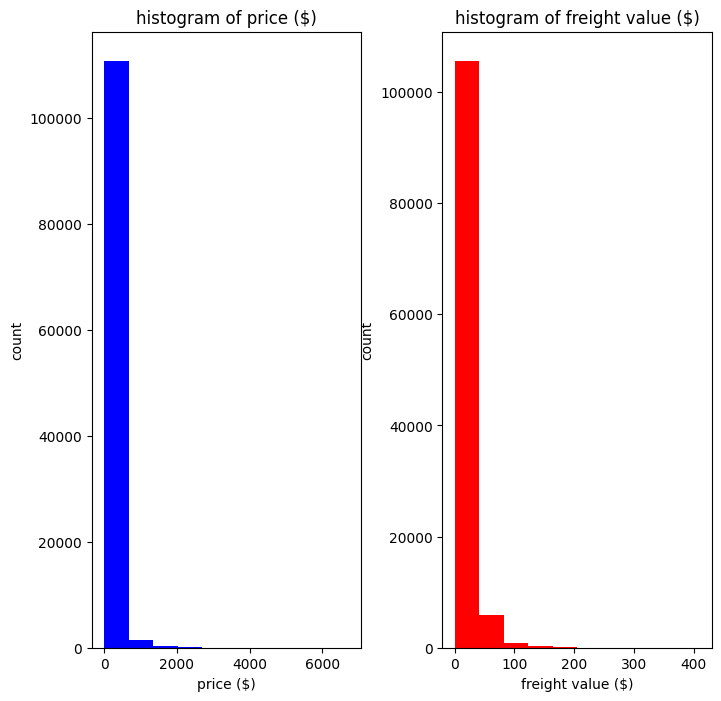

outlier dalam kolom adalah: [810.0, 639.0, 289.0, 397.0, 809.1, 390.0, 279.9, 492.75, 399.99, 540.0, 469.0, 499.0, 308.0, 579.0, 449.0, 1050.61, 362.45, 320.0, 849.0, 349.9, 419.9, 299.0, 299.0, 279.9, 379.0, 593.36, 389.0, 899.0, 279.99, 501.9, 1820.0, 399.9, 504.0, 610.0, 292.9, 299.0, 299.0, 379.0, 359.98, 359.98, 579.99, 399.9, 320.0, 349.99, 738.9, 579.0, 579.0, 579.0, 299.99, 309.9, 465.0, 629.9, 359.0, 339.99, 398.0, 398.0, 329.9, 285.9, 330.0, 1240.0, 1799.0, 284.8, 329.0, 559.99, 479.0, 989.0, 550.0, 279.9, 329.9, 349.99, 349.9, 509.0, 325.0, 499.9, 827.99, 379.0, 329.0, 2649.99, 467.0, 379.0, 1350.0, 292.9, 279.99, 319.0, 329.9, 454.0, 301.0, 349.9, 699.0, 388.0, 399.99, 399.99, 479.0, 779.0, 1199.9, 336.0, 630.0, 630.0, 479.0, 538.9, 1149.65, 339.9, 288.92, 1890.0, 299.99, 314.99, 1999.0, 858.9, 379.9, 467.0, 349.9, 599.0, 1680.0, 1680.0, 1680.0, 1680.0, 1680.0, 1680.0, 1680.0, 1680.0, 499.0, 364.98, 649.0, 297.0, 887.0, 519.0, 599.5, 349.0, 569.9, 489.0, 467.0, 467.0, 379.9

In [11]:
# menilai data barang pesanan
order_items_df.info()
print(f"\njumlah missing value\n{order_items_df.isna().sum()}")
print("\nJumlah duplikasi: ", order_items_df.duplicated().sum())
print(order_items_df.describe())

# deteksi outlier
# menggunakan histogram
fig, ax = plt.subplots(1,2,figsize=(8,8))
def create_hist(position, column_data, warna, judul, label_x, label_y):
    position.hist(column_data,color=warna)
    position.set_title(judul)
    position.set_xlabel(label_x)
    position.set_ylabel(label_y)

create_hist(ax[0],order_items_df["price"], 'blue', 'histogram of price ($)', 'price ($)', 'count')
create_hist(ax[1],order_items_df["freight_value"], 'red', 'histogram of freight value ($)', 'freight value ($)', 'count')
plt.subplots_adjust(wspace=0.3)
plt.show()

# perhitungan manual
def outlier_detect(column_data):
    q25, q75 = np.percentile(column_data, 25), np.percentile(column_data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    outliers = [x for x in column_data if x < minimum or x > maximum]
    if len(outliers)>0:
        print(f"outlier dalam kolom adalah: {outliers}")
    else:
        print("Tidak ada outlier dalam kolom") 

outlier_detect(order_items_df["price"])
outlier_detect(order_items_df["freight_value"])

**Insight**
- Pada **order_items_df** tidak ditemukan data duplikat dan data hilang
- Untuk **shipping_limit_date** seharusnya tipe data yang lebih tepat adalah **datetime**, sehingga perlu diubah pada tahap *cleaning data*.
- Jika melihat dari perbandingan rata-rata dan standar deviasi dengan nilai maksimum **price dan freight value**, masing-masing kolom mengindikasikan adanya outlier dalam data. Hasil data menggunakan histogram menunjukkan bahwa data numerik cenderung memiliki pola ***right skewed***, ini dapat mengindikasikan bahwa data cenderung mengumpul pada nilai yang rendah dan cenderung dapat mendeteksi outlier yang lebih dominan dengan nilai rata-rata yang tidak representatif. Penanganan distribusi data ini perlu dilakukan ketika sudah mencapai tahap statistik inferensial data agar sampel dapat merepresentasikan hasil prediksi yang baik dan tidak bias, salah satu caranya adalah dengan melaukan transformasi data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB



jumlah missing value
product_id                      0
product_category_name         610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Jumlah duplikasi:  0
       product_name_length  product_description_length  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max          

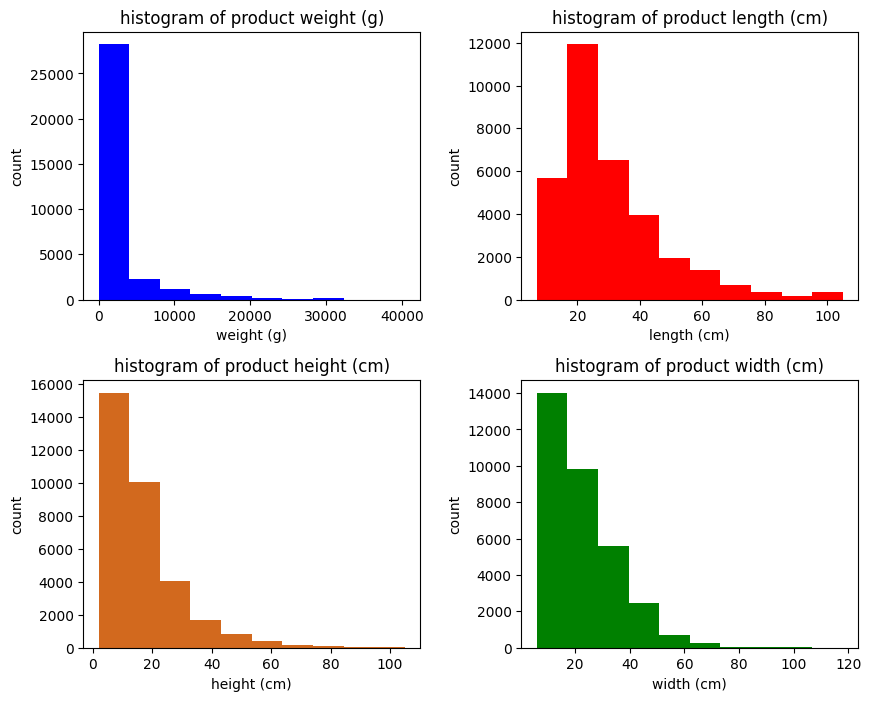

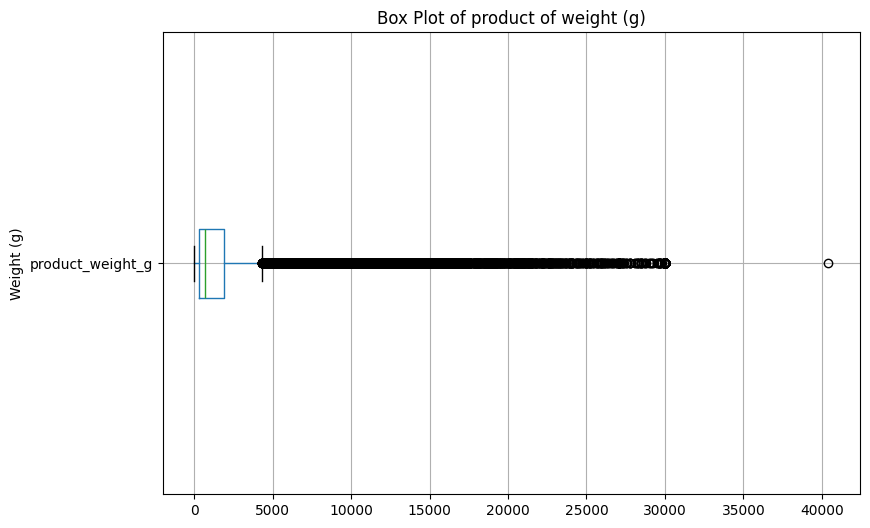

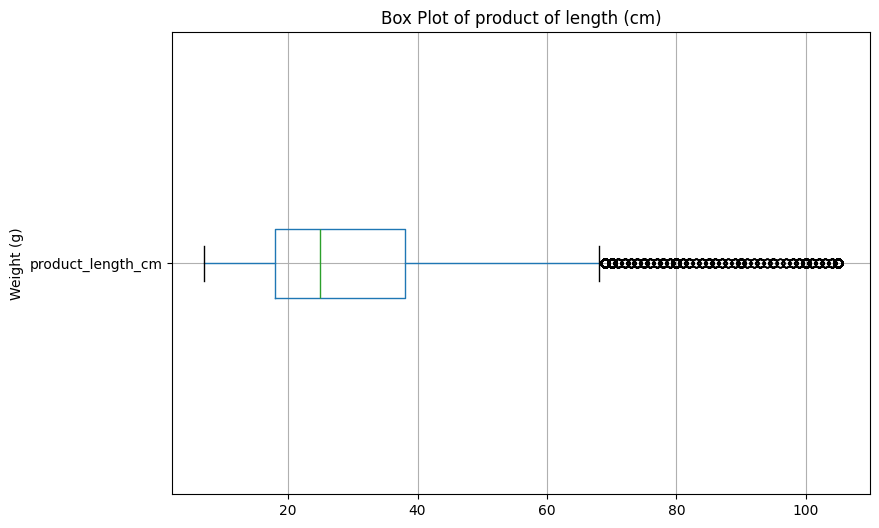

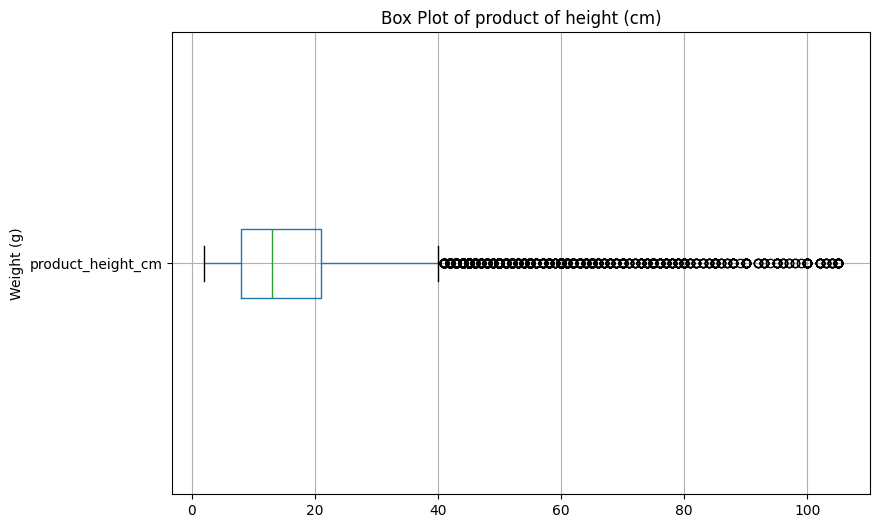

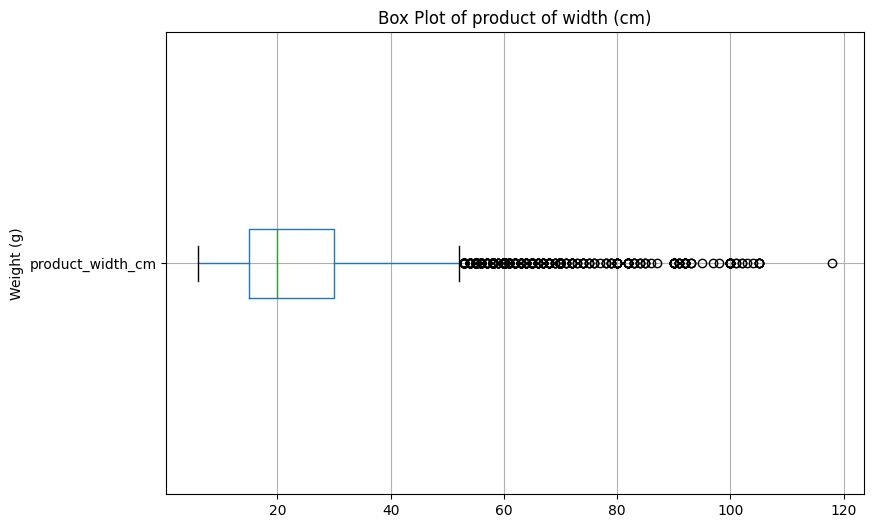

In [12]:
# mengoreksi typo nama "lenght" pada kolom
products_df.rename(columns={
    'product_name_lenght':'product_name_length',
    'product_description_lenght':'product_description_length'
    }, inplace= True
)

# menilai data produk
products_df.info()
print(f"\njumlah missing value\n{products_df.isna().sum()}")
print("\nJumlah duplikasi: ", products_df.duplicated().sum())
print(products_df.describe())

# deteksi outlier
# menggunakan histogram
fig, ax = plt.subplots(2,2,figsize=(10,8))
def create_hist(position, column_data, warna, judul, label_x, label_y):
    position.hist(column_data,color=warna)
    position.set_title(judul)
    position.set_xlabel(label_x)
    position.set_ylabel(label_y)

create_hist(ax[0,0],products_df["product_weight_g"], 'blue', 'histogram of product weight (g)', 'weight (g)', 'count')
create_hist(ax[0,1],products_df["product_length_cm"], 'red', 'histogram of product length (cm)', 'length (cm)', 'count')
create_hist(ax[1,0],products_df["product_height_cm"], 'chocolate', 'histogram of product height (cm)', 'height (cm)', 'count')
create_hist(ax[1,1],products_df["product_width_cm"], 'green', 'histogram of product width (cm)', 'width (cm)', 'count')
plt.subplots_adjust(hspace=0.3,wspace=0.3)
plt.show()

# Menggunakan box plot
def create_boxplot(column_data, title, measure):
    products_df.boxplot(column=column_data,figsize=(9,6),vert=False)
    plt.title(f"Box Plot of product of {title} ({measure})")
    plt.ylabel("Weight (g)")
    plt.show()

create_boxplot('product_weight_g','weight','g')
create_boxplot("product_length_cm",'length','cm')
create_boxplot("product_height_cm",'height','cm')
create_boxplot("product_width_cm",'width','cm')

**Insight:**
- Pada **products_df** tidak ditemukan data duplikat
- Terdapat data hilang pada hampir seluruh kolom, kecuali **product_id**, kemungkinan akan dilakukan pengisian data karena data yang hilang cukup banyak
- Untuk **product_name_length, product_description_length, dan product_photos_qty** seharusnya tipe data yang lebih tepat adalah **Int**, sehingga hal ini akan diubah setelahnya.
- Jika melihat dari perbandingan rata-rata dan standar deviasi dengan nilai maksimum, masing-masing kolom mengindikasikan adanya outlier dalam data yang nanti akan coba untuk dibersihkan. Hasil data menggunakan histogram menunjukkan bahwa data numerik cenderung memiliki pola ***right skewed***, ini dapat mengindikasikan bahwa data cenderung mengumpul pada nilai yang rendah dan cenderung dapat mendeteksi outlier yang lebih dominan dengan nilai rata-rata yang tidak representatif.
- Penanganan masalah distribusi data ini perlu dilakukan ketika mencapai tahap statistik inferensial, seperti regresi. Hal ini diperlukan untuk memperoleh hasil prediksi yang representatif dan tidak bias, salah satu caranya adalah dengan melakukan transformasi data untuk memperoleh distribusi normal.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

jumlah missing value
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah duplikasi:  0
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000

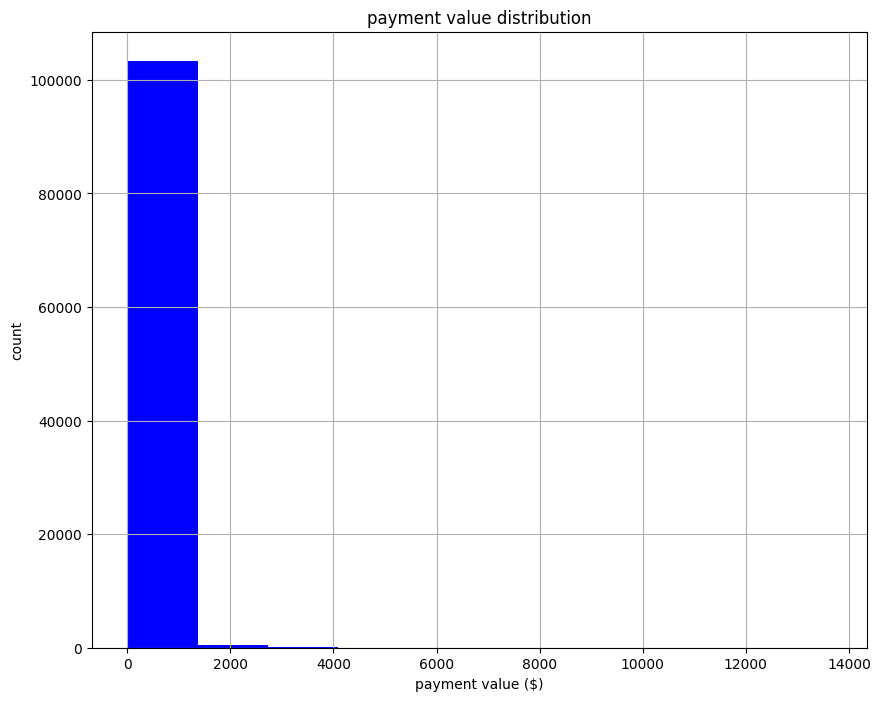

In [13]:
# menilai data pembayaran
payments_df.info()
print(f"\njumlah missing value\n{payments_df.isna().sum()}")
print("\nJumlah duplikasi: ", payments_df.duplicated().sum())
print(payments_df.describe())

#histogram payment value
payments_df.hist('payment_value',color='blue',figsize=(10,8))
plt.title('payment value distribution')
plt.xlabel('payment value ($)')
plt.ylabel('count')

# perhitungan manual
def outlier_detect(column_data):
    q25, q75 = np.percentile(column_data, 25), np.percentile(column_data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    outliers = [x for x in column_data if x < minimum or x > maximum]
    if len(outliers)>0:
        print(f"outlier dalam kolom adalah: {outliers}")
    else:
        print("Tidak ada outlier dalam kolom") 

outlier_detect(payments_df["payment_value"])


**Insight**
- Tidak terdeteksi masalah dalam data **payments_df**, baik dari segi data duplikat dan data hilang
- **payment_value** menunjukkan identifikasi distribusi data *right_skewed* yang perlu ditangani ketika mencapai analisis statistik inferensial
- Tipe data sudah sesuai dengan karakteristik data

### Cleaning Data

In [14]:
# membuang kolom review_comment_title hingga review_creation_date karena tidak akan digunakan dalam analisis
drop_columns = ["review_comment_title","review_comment_message","review_creation_date"]
reviews_df.drop(drop_columns,axis=1,inplace=True)

# membersihkan data reviews_df
## mengubah data tanggal waktu menjadi tipe datetime
reviews_df['review_answer_timestamp'] = pd.to_datetime(reviews_df['review_answer_timestamp'])

reviews_df.info()
reviews_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.0+ MB


,review_id,order_id,review_score,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-02 10:26:53


In [15]:
# Membersihkan data order_df
## menghapus data canceled dan unavailable dalam status pengiriman (menghapus 99441-98207 = 1234 baris)
orders_df = orders_df.loc[~orders_df['order_status'].isin(['canceled', 'unavailable'])]
print(orders_df["order_status"].value_counts())
print(orders_df.shape)

## mengubah data tanggal waktu menjadi tipe datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

orders_df.info()
orders_df.head(5)

order_status
delivered     96478
shipped        1107
invoiced        314
processing      301
created           5
approved          2
Name: count, dtype: int64
(98207, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 98207 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98207 non-null  object        
 1   customer_id                    98207 non-null  object        
 2   order_status                   98207 non-null  object        
 3   order_purchase_timestamp       98207 non-null  datetime64[ns]
 4   order_approved_at              98188 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97583 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98207 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.7+ M

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [16]:
# membersihkan data order_items_df
## mengubah data tanggal waktu menjadi tipe datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

order_items_df.info()
order_items_df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [17]:
# membersihkan data products_df
## menangani data hilang
column_miss = ['product_name_length', 'product_description_length', 'product_photos_qty']
products_df[products_df['product_weight_g'].isna()]

# ada satu data product_weight_g yang memiliki product_category_name, bisa dimasukkan angka yang hilang menggunakan median
# tidak menggunakan mean karena sepertinya data memiliki outlier, ditunjukkan dengan nilai max yang sangat tinggi
product_bebes = products_df.loc[products_df['product_category_name'] =='bebes']
product_bebes.describe()

# nilai median product_weight_g = 850, product_length_cm = 33, product_height_cm = 16, product_width_cm = 25
products_df.loc[products_df['product_category_name'] == 'bebes', 'product_weight_g'] = products_df.loc[products_df['product_category_name'] == 'bebes', 'product_weight_g'].fillna(850)
products_df.loc[products_df['product_category_name'] == 'bebes', 'product_length_cm'] = products_df.loc[products_df['product_category_name'] == 'bebes', 'product_length_cm'].fillna(33)
products_df.loc[products_df['product_category_name'] == 'bebes', 'product_height_cm'] = products_df.loc[products_df['product_category_name'] == 'bebes', 'product_height_cm'].fillna(16)
products_df.loc[products_df['product_category_name'] == 'bebes', 'product_width_cm'] = products_df.loc[products_df['product_category_name'] == 'bebes', 'product_width_cm'].fillna(25)

# membuang data hilang sisanya karena pertimbangan masih memiliki banyak data untuk dianalisis
products_df.dropna(subset='product_category_name',inplace=True)
print(f"\njumlah missing value\n{products_df.isna().sum()}")

# mengubah tipe data float menjadi tipe int
column_int = ['product_name_length', 'product_description_length', 'product_photos_qty']

for column in column_int:
    products_df[column] = products_df[column].astype(int)

products_df.info()
products_df.head()


jumlah missing value
product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  int32  
 3   product_description_length  32341 non-null  int32  
 4   product_photos_qty          32341 non-null  int32  
 5   product_weight_g            32341 non-null  float64
 6   product_length_cm           32341 non-null  float64
 7   product_height_cm           32341 non-null  float64
 8  

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625.0,20.0,17.0,13.0


**Insight:**
- Penghapusan beberapa kolom dalam data yang dianggap tidak sesuai dengan pertanyaan analisis
- Pengubahan tipe data tanggal dari *object* menjadi *datetime*
- Penghapusan data hilang pada kolom data dengan pertimbangan masih memiliki sisa cukup data untuk dianalisis
- Data yang memiliki indikasi *right-skewed distribution* akan diubah saat memasuki statistik inferensial, seperti **product_weight_g, product_length_cm, product_width_cm, product_height_cm, price, freight_value, dan payment_value**

## Exploratory Data Analysis (EDA)

### Explore customer_df

In [18]:
display(customers_df.describe(include="all"))

print(customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False))
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Insight:**
- Total data sebanyak 99441 konsumen
- Identifikasi **consumer_unique_id** yang memiliki jumlah terbanyak sebesar 17
- Pembeli berasal dari 4119 kota dan 27 *states* yang berbeda dimana **sao paulo** dan **SP** menjadi kota dan *state* dengan pembeli terbanyak sebesar 15540 dan 41746 pembeli
- Top 3 kota dengan paling banyak pembeli berasal dari **sao paulo**, **rio de janeiro**, dan **belo horizonte**
- Top 3 negara bagian dengan paling banyak pembeli berasal dari **SP**, **RJ**, dan **MG**

### Explore reviews_df

In [19]:
display(reviews_df.describe(include="all"))
reviews_df.groupby(by="review_answer_timestamp").review_id.nunique().sort_values(ascending=False)

,review_id,order_id,review_score,review_answer_timestamp
count,99224,99224,99224.000000,99224
unique,98410,98673,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,NaN
freq,3,3,NaN,NaN
mean,NaN,NaN,4.086421,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,2018-10-29 12:27:35


review_answer_timestamp
2017-12-09 15:28:29    3
2017-08-30 11:18:29    3
2017-06-15 23:21:05    3
2018-07-05 20:01:22    2
2018-04-02 17:57:53    2
                      ..
2017-11-24 01:04:26    1
2017-11-24 00:59:35    1
2017-11-24 00:52:57    1
2017-11-24 00:46:25    1
2018-10-29 12:27:35    1
Name: review_id, Length: 98248, dtype: int64

**insight**
- Terdapat sejumlah 98410 dan 98673 id konsumen yang untik untuk *review* dan *order* dengan total keseluruhan dari keduanya berjumlah 99224
- Rata-rata skor ulasan yang diberikan adalah **4.08** dengan nilai terendah adalah 1 dan tertinggi adalah 5
- Rentang jawaban ulasan pada tanggal 7 oktober 2016 hingga 29 oktober 2018
- Jawaban terbanyak yang pernah di submit selama satu hari ada pada tanggal 9 desember 2017, 30 oktober 2017, 15 juni 2017 dengan jumlah jawaban sebanyak 3.

### Explore orders_df

In [20]:
display(orders_df.info())
display(orders_df.describe(include="all"))
display(orders_df.isna().sum())
display(orders_df['order_status'].value_counts())
display(orders_df.groupby(by="order_purchase_timestamp").order_id.nunique().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Index: 98207 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98207 non-null  object        
 1   customer_id                    98207 non-null  object        
 2   order_status                   98207 non-null  object        
 3   order_purchase_timestamp       98207 non-null  datetime64[ns]
 4   order_approved_at              98188 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97583 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98207 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.7+ MB


None

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,98207,98207,98207,98207,98188,97583,96470,98207
unique,98207,98207,6,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 01:40:38.269115136,2018-01-01 13:06:46.455351040,2018-01-04 21:46:36.917465344,2018-01-14 12:41:33.581683456,2018-01-24 20:19:15.876872192
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,NaN,NaN,NaN,2017-09-13 09:55:58.500000,2017-09-13 19:02:00,2017-09-15 21:26:13,2017-09-25 22:15:09.500000,2017-10-04 00:00:00
50%,NaN,NaN,NaN,2018-01-19 17:07:24,2018-01-20 09:10:02,2018-01-24 13:48:56,2018-02-02 19:32:21,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 21:00:02,2018-05-05 10:00:01.500000,2018-05-08 13:50:00,2018-05-15 22:54:48.500000,2018-05-28 00:00:00
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  19
order_delivered_carrier_date      624
order_delivered_customer_date    1737
order_estimated_delivery_date       0
dtype: int64

order_status
delivered     96478
shipped        1107
invoiced        314
processing      301
created           5
approved          2
Name: count, dtype: int64

order_purchase_timestamp
2018-08-02 12:05:26    3
2018-06-01 13:39:44    3
2017-11-20 11:46:30    3
2018-03-31 15:08:21    3
2018-08-02 12:06:09    3
                      ..
2017-11-08 23:26:55    1
2017-11-08 23:19:24    1
2017-11-08 23:03:48    1
2017-11-08 23:03:19    1
2018-09-03 09:06:57    1
Name: order_id, Length: 97655, dtype: int64

In [21]:
# menghitung lama waktu pengiriman pada order_status = "delivered"

# mendapatkan waktu pengiriman berdasarkan status "delivered"
order_delivered = orders_df.loc[orders_df["order_status"].isin(["delivered"])].reset_index()

## menghitung nilai hilang pada kolom 'order_delivered_customer_date' dan 'order_delivered_carrier_date'
# ada 8 data hilang pada kolom order_delivered_customer_date pada data berstatus 'delivered', saya mengasumsikan bahwa data seharusnya ada dengan status "delivered" dan menganggap ini adalah human error
order_delivered[order_delivered['order_delivered_customer_date'].isna()]

# ada 2 data hilang pada kolom'order_delivered_carrier_date' pada data berstatus 'delivered',
order_delivered[order_delivered['order_delivered_carrier_date'].isna()]

## menghitung lama waktu pengiriman dari 'order_delivered_customer_date' ke 'order_delivered_carrier_date'
# selisih tanggal delivered dengan waktu pembelian pertama
dif_delivered_purchase_date = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
dif_delivered_purchase_date = dif_delivered_purchase_date.apply(lambda x: x.total_seconds())
dif_delivered_purchase_date = round(dif_delivered_purchase_date/86400)

# selisih tanggal delivered dengan tanggal kurir pengiriman
dif_delivered_carrier_date = orders_df['order_delivered_carrier_date'] - orders_df['order_purchase_timestamp']
dif_delivered_carrier_date = dif_delivered_carrier_date.apply(lambda x: x.total_seconds())
dif_delivered_carrier_date = round(dif_delivered_carrier_date/86400)

# didapatkan bahwa rata-rata pengiriman adalah 12.51 hari
# mengisi nilai hilang dengan rata-rata waktu pengiriman menggunakan timedelta
average_delivered_purchase_date = dif_delivered_purchase_date.mean()
average_delivered_carrier_date = dif_delivered_carrier_date.mean()

## mengisi data hilang dengan rata-rata kolom dari order_status 'delivered'
# Mengisi nilai hilang di 'order_delivered_customer_date' untuk order dengan status 'delivered'
orders_df.loc[
    (orders_df["order_status"] == "delivered") & (orders_df['order_delivered_customer_date'].isna()), 
    'order_delivered_customer_date'
] = orders_df['order_purchase_timestamp'] + pd.to_timedelta(average_delivered_purchase_date, unit='D')


# Mengisi nilai hilang di 'order_delivered_carrier_date' untuk order dengan status 'delivered'
orders_df.loc[
    (orders_df["order_status"] == "delivered") & (orders_df['order_delivered_carrier_date'].isna()), 
    'order_delivered_carrier_date'
] = orders_df['order_purchase_timestamp'] + pd.to_timedelta(average_delivered_carrier_date, unit='D')

# Menghitung ulang selisih tanggal delivered dengan waktu pembelian
dif_delivered_purchase_date = abs(orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp'])
orders_df['dif_delivered_purchase_date'] = dif_delivered_purchase_date.apply(lambda x: x.total_seconds() / 86400).round()

# Menghitung ulang selisih tanggal delivered dengan tanggal kurir pengiriman
dif_delivered_carrier_date = abs(orders_df['order_delivered_carrier_date'] - orders_df['order_purchase_timestamp'])
orders_df['dif_delivered_carrier_date'] = dif_delivered_carrier_date.apply(lambda x: x.total_seconds() / 86400).round()



In [22]:
print(dif_delivered_carrier_date.sort_values(ascending=False))


25883   171 days 05:05:53
36305   125 days 18:36:45
35213   107 days 01:33:02
3077    104 days 07:22:48
44200    66 days 01:17:13
               ...       
98845                 NaT
99031                 NaT
99066                 NaT
99140                 NaT
99313                 NaT
Length: 98207, dtype: timedelta64[ns]


In [23]:
display(orders_df.head())
display(orders_df.describe(include="all"))
display(orders_df.isna().sum())

# check nilai hilang di order_status = 'delivered'
display(orders_df[orders_df['order_status'] =='delivered'].isna().sum())

#check nilai hilang dari masing-masing kolom dari order_status = 'delivered'
display(orders_df[(orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_carrier_date'].isna())])
display(orders_df[(orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_customer_date'].isna())])
display(orders_df.info())

display(orders_df.sort_values(by='dif_delivered_carrier_date',ascending=True).head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dif_delivered_purchase_date,dif_delivered_carrier_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,2.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,2.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,4.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1.0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dif_delivered_purchase_date,dif_delivered_carrier_date
count,98207,98207,98207,98207,98188,97585,96478,98207,96478.000000,97585.000000
unique,98207,98207,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 01:40:38.269115136,2018-01-01 13:06:46.455351040,2018-01-04 21:41:58.005751296,2018-01-14 12:53:21.602264832,2018-01-24 20:19:15.876872192,12.517092,3.229584
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,0.000000
25%,NaN,NaN,NaN,2017-09-13 09:55:58.500000,2017-09-13 19:02:00,2017-09-15 21:24:48,2017-09-25 22:18:14.500000,2017-10-04 00:00:00,7.000000,1.000000
50%,NaN,NaN,NaN,2018-01-19 17:07:24,2018-01-20 09:10:02,2018-01-24 13:44:49,2018-02-02 19:41:06,2018-02-15 00:00:00,10.000000,2.000000
75%,NaN,NaN,NaN,2018-05-04 21:00:02,2018-05-05 10:00:01.500000,2018-05-08 13:50:00,2018-05-15 23:09:25.750000128,2018-05-28 00:00:00,16.000000,4.000000
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000,171.000000


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  19
order_delivered_carrier_date      622
order_delivered_customer_date    1729
order_estimated_delivery_date       0
dif_delivered_purchase_date      1729
dif_delivered_carrier_date        622
dtype: int64

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      0
order_delivered_customer_date     0
order_estimated_delivery_date     0
dif_delivered_purchase_date       0
dif_delivered_carrier_date        0
dtype: int64

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dif_delivered_purchase_date,dif_delivered_carrier_date


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dif_delivered_purchase_date,dif_delivered_carrier_date


<class 'pandas.core.frame.DataFrame'>
Index: 98207 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98207 non-null  object        
 1   customer_id                    98207 non-null  object        
 2   order_status                   98207 non-null  object        
 3   order_purchase_timestamp       98207 non-null  datetime64[ns]
 4   order_approved_at              98188 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97585 non-null  datetime64[ns]
 6   order_delivered_customer_date  96478 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98207 non-null  datetime64[ns]
 8   dif_delivered_purchase_date    96478 non-null  float64       
 9   dif_delivered_carrier_date     97585 non-null  float64       
dtypes: datetime64[ns](5), float64(2), object(3)
memory usage: 10.3+ MB


None

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dif_delivered_purchase_date,dif_delivered_carrier_date
86857,9459fe4630e1165c113f9fdb4ad5b261,737044a1637b4c3e17f927d096620325,delivered,2017-11-17 10:25:11,2017-11-17 10:51:06,2017-11-17 19:56:46,2017-11-21 20:43:03,2017-12-05,4.0,0.0
91435,41c51367243707ec4b1cf8baae5de951,714f2635d40b3e5d19a2fac7552846f3,delivered,2018-07-27 13:11:52,2018-07-27 13:25:22,2018-07-27 13:52:00,2018-07-31 22:48:55,2018-08-15,4.0,0.0
6641,296a93c03580ee2cd6d1c20346191d6b,598f6ea65e0d55d010f88b0093381db5,delivered,2018-02-14 11:37:43,2018-02-14 11:50:30,2018-02-14 22:33:20,2018-02-27 11:22:54,2018-03-13,13.0,0.0
54249,675c52d8dfa16aa7a3b12b6ad7466fbb,7d4b050bcbcbf1f4c538c28a4d45842b,delivered,2017-09-14 11:34:46,2017-09-14 11:50:20,2017-09-14 21:29:50,2017-09-26 19:48:40,2017-10-06,12.0,0.0
37203,1fed6df7b405432dd6dc44693a35b86c,0c42229f9ebb31ce346a983185d7743a,delivered,2018-07-30 12:06:23,2018-07-30 12:24:54,2018-07-30 15:17:00,2018-08-06 12:57:32,2018-08-02,7.0,0.0


**Insight**
- Total baris pada data ini sebanyak 98207
- Kategori **order_status** terbanyak adalah *delivery* dengan jumlah 96478, diikuti dengan *shipped* (1107) dan *invoiced* (314)
- Rentang *order_purchase_timestamp* data ini dari tanggal 4 september 2016 hingga 3 september 2018
- Rata-rata waktu pengiriman sampai ke konsumen adalah 13 hari dengan paling cepat adalah 1 hari dan paling lama adalah 210 hari
- Rata-rata waktu pengiriman sampai ke kurir adalah 3,23 hari dengan paling cepat dikirimkan hari itu (0 hari) dan paling lambat adalah 171 hari

### Explore customers_df dan orders_df

In [24]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
display(customers_df.sample(5))


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
65687,9914ae7a72a8729b8e0c04894e50c586,9e64f4be8f489777a028e0e37825f3a4,13174,sumare,SP,Active
21787,3234e6c13c6fd6f5697f19fbafe83d10,5adfdd0397ae5abe3fdf520b61ca5d96,3515,sao paulo,SP,Active
96706,2d315bbcfcb641c8248712be4ac56c0d,782f78691d986d45ed2341715082b993,5847,sao paulo,SP,Active
40794,51c01649e2b270e89b1c14207e08ec84,c5cc0bee4b73138ed973a1720df085aa,3423,sao paulo,SP,Active
74169,13d4bfc7473f56b5218e656f80d2ac67,34ea5dfaac1f0059dc4eebe650ad636e,19027,presidente prudente,SP,Active


In [25]:
customers_df.groupby(by="status").customer_id.count()

status
Active        98207
Non Active     1234
Name: customer_id, dtype: int64

In [26]:
# merge data orders_df dan customers_df
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dif_delivered_purchase_date,dif_delivered_carrier_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,2.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,2.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,0.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,4.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [27]:
# melihat jumlah order berdasarkan kota dan negara bagian
display(orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10))
display(orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10))

# melihat rata-rata lama waktu pengiriman berdasarkan kota dan negara bagian
display(orders_customers_df.groupby(by="customer_city").dif_delivered_purchase_date.mean().sort_values(ascending=True).reset_index().head(10))
display(orders_customers_df.groupby(by="customer_state").dif_delivered_purchase_date.mean().sort_values(ascending=True).reset_index().head(10))

# melihat rata-rata lama pengemasan sampai ke tangan kurir
display(orders_customers_df.groupby(by="customer_city").dif_delivered_carrier_date.mean().sort_values(ascending=False).reset_index().head(10))
display(orders_customers_df.groupby(by="customer_state").dif_delivered_carrier_date.mean().sort_values(ascending=False).reset_index().head(10))


,customer_city,order_id
0,sao paulo,15291
1,rio de janeiro,6801
2,belo horizonte,2737
3,brasilia,2112
4,curitiba,1502
5,campinas,1422
6,porto alegre,1370
7,salvador,1234
8,guarulhos,1167
9,sao bernardo do campo,921


,customer_state,order_id
0,SP,41127
1,RJ,12698
2,MG,11496
3,RS,5417
4,PR,4983
5,SC,3600
6,BA,3344
7,DF,2121
8,ES,2018
9,GO,1998


,customer_city,dif_delivered_purchase_date
0,iomere,3.0
1,siriji,3.0
2,agua doce,4.0
3,divino das laranjeiras,4.0
4,contenda,4.0
5,acucena,4.0
6,pedra bela,4.0
7,barao de juparana,4.0
8,sao patricio,4.0
9,cambara do sul,4.0


,customer_state,dif_delivered_purchase_date
0,SP,8.722081
1,PR,11.947999
2,MG,11.966532
3,DF,12.923558
4,SC,14.923576
5,RJ,15.264372
6,RS,15.268101
7,MS,15.543509
8,GO,15.559530
9,ES,15.735840


,customer_city,dif_delivered_carrier_date
0,machadinho,44.0
1,boa vista do gurupi,30.0
2,galinhos,30.0
3,bacaxa,26.0
4,sarapui,25.5
5,sao felix,22.0
6,ibitioca,22.0
7,joaquim pires,22.0
8,bugre,21.0
9,botupora,21.0


,customer_state,dif_delivered_carrier_date
0,RR,4.577778
1,SE,3.645349
2,MA,3.595368
3,RN,3.571726
4,AP,3.522388
5,PA,3.484974
6,PB,3.475379
7,AC,3.444444
8,AL,3.421182
9,TO,3.397112


**Insight**
- Semua pelanggan yang tercatat di customer_id baik yang pernah tercatat melakukan pemesanan maupun yang dibatalkan atau tidak tersedia (canceled & unavailable) semuanya tercatat pernah melakukan riwayat pemesanan. Namun karena saya diawal menghapus order_status 'canceled' & 'unavailable', maka **customer_id** di **order_df** terhapus, sehingga seolah tidak pernah tercatat melakukan transaksi dan status menjadi 'non active'.
- Kota yang paling banyak melakukan order adalah Sao Paulo dan Rio De Janeiro dengan jumlah order 15291 dan 6801
- Kota **iomere** dan **siriji** memiliki rata-rata lama pengiriman dari waktu pembelian hingga sampai ke tangan konsumen dengan waktu tersingkat, yaitu 3 hari dibandingkan kota lain
- Negara bagian yang paling banyak melakukan order adalah SP dan RJ dengan jumlah order 41127 dan 12698
- Negara bagian **SP** dan **PR** memiliki rata-rata lama pengiriman dari waktu pembelian hingga sampai ke tangan konsumen dengan waktu tersingkat, yaitu 8,7 hari dibandingkan kota lain
- Kota toko cabang yang memiliki rata-rata lama pengiriman ke kurir terlama berada di kota **machadinho** dan **boa vista do gurupi** dengan lama waktu 44 dan 30 hari
- Negara bagian toko cabang yang memiliki rata-rata lama pengiriman ke kurir terlama berada di negara bagian **RR** dan **SE**

### Explore orders_df dan reviews_df

In [28]:
# melihat customer yang order apakah memberikan review atau tidak 
order_id_in_reviews_df =  reviews_df.order_id.tolist()
orders_df["reviewed"] = orders_df["order_id"].apply(lambda x: "Yes" if x in order_id_in_reviews_df else "No")
display(orders_df.sample(5))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dif_delivered_purchase_date,dif_delivered_carrier_date,reviewed
50388,f280a59cad4cf94ec053b78a58dd0648,c3f03ad00c3a59d7e1be8376fcd6e9f2,delivered,2017-08-04 16:40:28,2017-08-05 17:31:23,2017-08-09 17:58:29,2017-08-10 20:53:37,2017-08-28,6.0,5.0,Yes
48115,1cebcb9fc81f76f727c7be020cb6cb49,df60b6f129c54677f5862b3b7083f2e5,delivered,2017-12-25 09:17:47,2017-12-25 09:27:23,2018-01-03 17:47:03,2018-01-26 23:52:59,2018-02-01,33.0,9.0,Yes
64510,06a398a5e672222b10f098541b70da76,89613c693397667078f2b43896e6c8c5,delivered,2018-08-09 06:54:16,2018-08-09 07:05:14,2018-08-09 13:43:00,2018-08-25 01:52:37,2018-09-03,16.0,0.0,Yes
11809,594ede9623d6ce9f955be5b0fd0f0baa,ec79f2106aae0f5720cc62400e567cbf,delivered,2018-01-15 14:21:22,2018-01-15 14:30:00,2018-01-17 02:45:02,2018-01-29 19:59:12,2018-01-31,14.0,2.0,Yes
42466,7298f7a474d54998fe1d4c98f0779eff,8d5c9911b3188c197d27411808705b52,delivered,2017-08-04 22:46:46,2017-08-04 23:05:24,2017-08-08 00:07:24,2017-08-18 16:35:08,2017-08-28,14.0,3.0,Yes


In [29]:
# merge data orders_df dan customers_df
orders_reviews_df = pd.merge(
    left=orders_df,
    right=reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_reviews_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dif_delivered_purchase_date,dif_delivered_carrier_date,reviewed,review_id,review_score,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,2.0,Yes,a54f0611adc9ed256b57ede6b6eb5114,4.0,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,2.0,Yes,8d5266042046a06655c8db133d120ba5,4.0,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,0.0,Yes,e73b67b67587f7644d5bd1a52deb1b01,5.0,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,4.0,Yes,359d03e676b3c069f62cadba8dd3f6e8,5.0,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1.0,Yes,e50934924e227544ba8246aeb3770dd4,5.0,2018-02-18 13:02:51


In [30]:
display(orders_reviews_df['reviewed'].value_counts())

# melihat jarak pemberian ulasan terhadap pengiriman sampai ke konsumen
dif_review_delivered_date = orders_reviews_df['review_answer_timestamp'] - orders_reviews_df['order_delivered_customer_date']
dif_review_delivered_date = dif_review_delivered_date.apply(lambda x: x.total_seconds())
orders_reviews_df['dif_review_delivered_date'] = round(dif_review_delivered_date/86400)
display(orders_reviews_df.sort_values(by='dif_review_delivered_date',ascending=True))
display(orders_reviews_df.describe(include='all'))

before_delivered = orders_reviews_df[orders_reviews_df['dif_review_delivered_date'] < 0]
after_delivered = orders_reviews_df[orders_reviews_df['dif_review_delivered_date'] >= 0]
print(f"jumlah konsumen yang memberikan ulasan sebelum produk sampai ke tangan mereka {before_delivered['dif_review_delivered_date'].count()}")
print(f"rata-rata nilai ulasan sebelum produk sampai ke tangan mereka {before_delivered['review_score'].mean()}")
print(f"jumlah konsumen yang memberikan ulasan setelah produk sampai ke tangan mereka {after_delivered['dif_review_delivered_date'].count()}")
print(f"rata-rata nilai ulasan setelah produk sampai ke tangan mereka {after_delivered['review_score'].mean()}")

# melihat jumlah review berdasarkan kategori skor
display(orders_reviews_df.groupby(by="review_score").reviewed.count().sort_values(ascending=False).reset_index().head(10))

# melihat kategori reviewd berdasarkan order_status
display(orders_reviews_df.groupby(by='order_status').reviewed.value_counts())

reviewed
Yes    98018
No       734
Name: count, dtype: int64

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dif_delivered_purchase_date,dif_delivered_carrier_date,reviewed,review_id,review_score,review_answer_timestamp,dif_review_delivered_date
55211,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-02-23 15:16:14,2018-02-26 18:49:07,2018-09-19 23:24:07,2018-03-15,208.0,3.0,Yes,ae83a790a3f01e1c43dd4d2863cebe0c,2.0,2018-03-17 05:08:11,-187.0
38235,0f4519c5f1c541ddec9f21b3bddd533a,1a8a4a30dc296976717f44e7801fdeef,delivered,2017-03-09 13:26:57,2017-03-09 13:26:57,2017-03-22 05:28:14,2017-09-19 14:38:21,2017-04-11,194.0,13.0,Yes,c47c609e174933bb312e4a9174beb9dc,4.0,2017-03-29 21:10:37,-174.0
11330,47b40429ed8cce3aee9199792275433f,cb2caaaead400c97350c37a3fc536867,delivered,2018-01-03 09:44:01,2018-01-03 10:31:15,2018-02-06 01:48:28,2018-07-13 20:51:31,2018-01-19,191.0,34.0,Yes,2a87b7df4f64481f0db340b1196ab9fc,1.0,2018-01-24 16:45:40,-170.0
69819,2fb597c2f772eca01b1f5c561bf6cc7b,217906bc11a32c1e470eb7e08584894b,delivered,2017-03-08 18:09:02,2017-03-08 18:09:02,2017-03-13 08:54:02,2017-09-19 14:33:17,2017-04-17,195.0,5.0,Yes,02961f307c58fd16d942308f13ac88cd,4.0,2017-04-06 10:56:50,-166.0
68291,c27815f7e3dd0b926b58552628481575,f85e9ec0719b16dc4dd0edd438793553,delivered,2017-03-15 23:23:17,2017-03-15 23:23:17,2017-03-21 14:50:25,2017-09-19 17:14:25,2017-04-10,188.0,6.0,Yes,995b723688e96fcebb33288a918efc64,3.0,2017-04-06 15:30:39,-166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98452,2f2df159f26ddb73d55ee72372200d3e,86a7245fffe6a418ca1658a13ecc4531,delivered,2017-07-17 01:19:50,2017-07-17 01:30:09,2017-07-17 22:14:50,2017-07-26 09:44:00,2017-08-09,9.0,1.0,No,NaN,NaN,NaT,NaN
98458,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaT,NaT,2018-01-26,NaN,NaN,Yes,f6759f43e623fa4ef8c0a698458c0689,1.0,2018-01-28 21:10:38,NaN
98497,636cdd02667dc8d76d9296bf20a6890a,c162256b133c76f79181ce61d66545db,shipped,2018-02-17 14:31:22,2018-02-20 07:11:31,2018-02-20 19:18:58,NaT,2018-03-14,NaN,3.0,Yes,5bc9dc407453b72d2ed022e4105a9197,1.0,2018-03-19 20:30:29,NaN
98561,dff2b9b8d7cfc595836945e1443789c3,2436fb2666a65fbacae82532e797cabf,delivered,2018-07-16 12:59:02,2018-07-17 04:21:00,2018-07-17 15:08:00,2018-07-20 20:41:32,2018-08-07,4.0,1.0,No,NaN,NaN,NaT,NaN


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dif_delivered_purchase_date,dif_delivered_carrier_date,reviewed,review_id,review_score,review_answer_timestamp,dif_review_delivered_date
count,98752,98752,98752,98752,98733,98125,97007,98752,97007.000000,98125.000000,98752,98018,98018.000000,98018,96361.000000
unique,98207,98207,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,97270,NaN,NaN,NaN
top,03c939fd7fd3b38f8485a0f95798f1f6,2a35ad9f439dfc62d35a0202e71d6c66,delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,1fb4ddc969e6bea80e38deec00393a6f,NaN,NaN,NaN
freq,3,3,97007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98018,3,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 17:53:58.145161472,2018-01-01 05:19:54.266395136,2018-01-04 13:58:25.592440320,2018-01-14 05:10:01.514852096,2018-01-24 12:46:28.366817792,12.522931,3.231429,NaN,NaN,4.116122,2018-01-16 13:55:01.997765632,2.882878
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,0.000000,NaN,NaN,1.000000,2016-10-07 18:32:28,-187.000000
25%,NaN,NaN,NaN,2017-09-12 20:59:10.500000,2017-09-13 12:04:28,2017-09-15 19:26:09,2017-09-25 20:12:24.500000,2017-10-04 00:00:00,7.000000,1.000000,NaN,NaN,4.000000,2017-09-27 23:12:44.750000128,1.000000
50%,NaN,NaN,NaN,2018-01-19 12:17:15.500000,2018-01-19 19:49:44,2018-01-23 23:54:49,2018-02-02 16:12:53,2018-02-15 00:00:00,10.000000,2.000000,NaN,NaN,5.000000,2018-02-05 13:45:38,2.000000
75%,NaN,NaN,NaN,2018-05-04 15:04:48.500000,2018-05-04 22:53:34,2018-05-08 12:25:00,2018-05-15 20:07:32.500000,2018-05-25 00:00:00,16.000000,4.000000,NaN,NaN,5.000000,2018-05-20 13:32:43.249999872,3.000000
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000,171.000000,NaN,NaN,5.000000,2018-10-29 12:27:35,519.000000


jumlah konsumen yang memberikan ulasan sebelum produk sampai ke tangan mereka 4436
rata-rata nilai ulasan sebelum produk sampai ke tangan mereka 1.774346257889991
jumlah konsumen yang memberikan ulasan setelah produk sampai ke tangan mereka 91925
rata-rata nilai ulasan setelah produk sampai ke tangan mereka 4.2706336687516995


,review_score,reviewed
0,5.0,57223
1,4.0,19096
2,1.0,10539
3,3.0,8096
4,2.0,3064


order_status  reviewed
approved      Yes             2
created       Yes             3
              No              2
delivered     Yes         96361
              No            646
invoiced      Yes           313
              No              5
processing    Yes           296
              No              6
shipped       Yes          1043
              No             75
Name: count, dtype: int64

**Insight**
- Sebanyak **734** dari **98207** konsumen belum memberikan ulasan terhadap produk yang dipesan oleh mereka
- Konsumen memberikan ulasan terbanyak pada kategori **bintang 5** sebanyak 57k, sedangkan ulasan paling sedikit ada pada **bintang 2** sebanyak 3064 konsumen
- Rata-rata seseorang memberikan ulasan adalah 2,88 atau **3 hari** setelah pesanan sampai ke konsumen. Catatan: tidak semua jawaban ulasan diberikan setelah pengiriman sampai, ada juga yang memberikan nilai sebelum paket mereka sampai ke tangan konsumen dengan tanda selisih nilai yang minus
- Ada sebanyak **4436 konsumen** yang memberikan ulasan sebelum produk sampai ke tangan mereka dengan rata-rata nilai ulasan yang diberikan adalah **1,77** dari 5
- Sedangkan sebanyak 91925 konsumen memberikan ulasan setelah produk sampai ke tangan mereka dengan rata-rata nilai ulasan yang diberikan adalah **4,27** dari 5

### Explore customers_df, reviews_df dan orders_df

In [31]:
# merge customers_df dengan orders_reviews_df
customers_orders_reviews_df = pd.merge(
    left=customers_df,
    right=orders_reviews_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

customers_orders_reviews_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dif_delivered_purchase_date,dif_delivered_carrier_date,reviewed,review_id,review_score,review_answer_timestamp,dif_review_delivered_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,9.0,7.0,Yes,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-30 22:34:40,5.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,17.0,3.0,Yes,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-02-10 22:43:29,12.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,26.0,23.0,Yes,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15 12:10:59,1.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,15.0,14.0,Yes,059a801bb31f6aab2266e672cab87bc5,5.0,2018-04-02 18:36:47,5.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,11.0,1.0,Yes,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-17 01:59:52,7.0


In [32]:
# melihat kota dan negara bagian yang memberikan nilai skor ulasan tertinggi
display(customers_orders_reviews_df.groupby(by="customer_city").review_score.value_counts().sort_values(ascending=False).reset_index().head(10))
display(customers_orders_reviews_df.groupby(by="customer_state").review_score.value_counts().sort_values(ascending=False).reset_index().head(10))

# melihat kota dan negara bagian yang memberikan rata-rata penilaian ulasan tercepat dan terlama
display(customers_orders_reviews_df.groupby(by="customer_city").dif_review_delivered_date.mean().sort_values(ascending=False,na_position='first').reset_index())
display(customers_orders_reviews_df.groupby(by="customer_state").dif_review_delivered_date.mean().sort_values(ascending=False).reset_index())

,customer_city,review_score,count
0,sao paulo,5.0,9297
1,rio de janeiro,5.0,3796
2,sao paulo,4.0,2926
3,belo horizonte,5.0,1609
4,sao paulo,1.0,1405
5,sao paulo,3.0,1212
6,brasilia,5.0,1203
7,rio de janeiro,4.0,1127
8,rio de janeiro,1.0,1083
9,curitiba,5.0,943


,customer_state,review_score,count
0,SP,5.0,25084
1,SP,4.0,7973
2,RJ,5.0,6920
3,MG,5.0,6838
4,SP,1.0,3605
5,SP,3.0,3255
6,RS,5.0,3201
7,PR,5.0,3015
8,MG,4.0,2257
9,RJ,4.0,2131


,customer_city,dif_review_delivered_date
0,alto bela vista,NaN
1,apiacas,NaN
2,avai,NaN
3,baguari,NaN
4,boquim,NaN
...,...,...
4114,serra dos dourados,-45.0
4115,arace,-53.0
4116,adhemar de barros,-66.0
4117,capinzal do norte,-76.0


,customer_state,dif_review_delivered_date
0,RO,4.454545
1,TO,3.523810
2,MS,3.342254
3,MG,3.298925
4,PR,3.209392
5,AM,3.206897
6,SP,3.073017
7,DF,3.058880
8,SC,3.035098
9,RN,2.923890


**Insight**
- Kota yang memberikan nilai kategori 5 terbanyak adalah **Sao Paulo** dan **Rio De Janeiro** dengan jumlah 9297 dan 3796 konsumen. Namun, di lain sisi, **Sao Paulo** menjadi kota yang memberikan nilai kategori 1 terbanyak dengan jumlah 1405
- Kota *gap* terbesar untuk memberikan nilai ulasan setelah pengiriman sampai ke penjual adalah **guarapua** dan **quilometro 14 do mutum**. Sedangkan, kota yang memberikan ulasan tercepat sebelum pengiriman sampai ke penjual adalah **novo brasil** dan **capinzal do norte**
- Negara bagian yang memberikan nilai kategori 5 terbanyak adalah **SP** dengan jumlah 25084 konsumen. Di lain sisi, **SP** juga menyumbang nilai kategori 1 terbanyak dengan total 3605 konsumen

### Exploratory order_items_df

In [33]:
display(order_items_df.info())
display(order_items_df.describe(include="all"))
display(order_items_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


None

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**Insight**
- total baris dari **order_items_df** adalah 112650 dengan **order_id** unik adalah 98666.
- **order_item_id** berada pada rentang 1 - 21 yang berarti pesanan barang per transaksi terbanyak adalah **21 produk**
- kolom **product_id** unik ada sejumlah 32951, setara dengan 32951 produk
- kolom **seller_id** unik ada sejumlah 3095 dengan toko yang menjual produk terbanyak adalah mencapai 2033
- kolom **price** memiliki rata-rata per pembelian $121 dengan nilai pembelian terbesar adalah $6735
- kolom **freight_value** memiliki rata-rata biaya pengiriman $20 per transaksi dengan nilai pengiriman terbesar adalah $409

### Exploratory Product_df

In [34]:
display(products_df.info())
display(products_df.describe(include="all"))
display(products_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  int32  
 3   product_description_length  32341 non-null  int32  
 4   product_photos_qty          32341 non-null  int32  
 5   product_weight_g            32341 non-null  float64
 6   product_length_cm           32341 non-null  float64
 7   product_height_cm           32341 non-null  float64
 8   product_width_cm            32341 non-null  float64
dtypes: float64(4), int32(3), object(2)
memory usage: 2.1+ MB


None

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341,32341,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000,32341.000000
unique,32341,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.912464,30.854612,16.958783,23.208652
std,NaN,NaN,10.245741,635.115225,1.736766,4279.233040,16.955707,13.635905,12.078580
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight**
- Jumlah produk yang ditawarkan sebanyak **32341 produk** dengan  **73 kategori** yang berbeda
- Produk kategori terbanyak adalah **cama_mesa_banho** dengan jumlah 3029 product_id yang berbeda
- Rata-rata berat, panjang, tinggi, dan lebar dari produk yang ada adalah **2.3 kg, 31 cm, 17 cm, dan 23 cm** berturut-turut dengan jumlah foto yang ditampilkan rata-rata adalah 2 foto per produk
- Nilai maksimum dari berat, panjang, tinggi, dan lebar dari produk yang ada adalah **40.5 kg, 105 cm, 105 cm, 118 cm** berturut-turut dengan jumlah foto yang ditampilkan terbanyak adalah 20 foto per produk

### Exploratory Payment_df

In [35]:
display(payments_df.info())
display(payments_df.describe(include="all"))
display(payments_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**Insight**
- baris **order_id** yang tercatat sebanyak 103886 dengan 99440 memiliki kode yang unik. Dari sini bisa disimpulkan bahwa ada beberapa **order_id** yang sama, mungkin konsumen membeli produk lebih dari satu saat pemesanan dalam satu **order_id** yang sama, sehingga terdapat duplikat **order_id**.
- Telihat bahwa dalam satu **order_id** yang memiliki jumlah duplikasi terbanyak adalah 29, yang berarti konsumen melakukan pemesanan dalam satu order sebanyak **29 produk**
- **payment_sequential** adalah jumlah pembayaran yang dilakukan per transaksi, disini terlihat bahwa rata-rata adalah 1,1 yang berarti bahwa rata-rata konsumen membayar dalam satu kali per transaksi saja. Dengan jumlah pembayaran per transaksi terbanyak adalah 29 pembayaran.
- Jenis pembayaran terbanyak adalah **credit_card** dengan jumlah 76795 transaksi dari 5 tipe pembayaran berbeda
- **payment_installment** berarti pembayaran cicilan yang dilakukan untuk menyelesaikan satu transaksi, disini terlihat bahwa rata-ratanya adalah **2,8** atau dibulatkan menjadi **3**, berarti rata-rata konsumen memilih membayar total pesanan mereka dalam 3 kali cicilan dengan cicilan yang diajukan terbesar adalah **24 kali**
- **payment_value** merujuk kepada total pesanan per transaksi, rata-ratanya adalah **$154** dengan nilai terbesar adalah **$13664**.

### Exploratory product_df & order_items_df

In [36]:
## menggabungkan dataset product_df dan order_items_df
products_order_items_df = pd.merge(
    left=products_df,
    right=order_items_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

products_order_items_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [37]:
## cek jumlah hitungan order item terbanyak berdasarkan kategori
display(products_order_items_df.groupby("product_category_name").order_item_id.count().sort_values(ascending=False).reset_index())

## cek jumlah price terbanyak berdasarkan kategori
display(products_order_items_df.groupby("product_category_name").price.sum().sort_values(ascending=False).reset_index())

## cek jumlah freight value terbanyak berdasarkan kategori
display(products_order_items_df.groupby("product_category_name").freight_value.sum().sort_values(ascending=False).reset_index())

## cek pengaruh berat barang terhadap freight_value
products_order_items_df[['product_weight_g', 'freight_value']].corr()

## cek pengaruh panjang, lebar, dan tinggi barang terhadap freight_value
products_order_items_df[['product_length_cm', 'product_width_cm','product_height_cm', 'freight_value']].corr()

,product_category_name,order_item_id
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827
...,...,...
68,cds_dvds_musicais,14
69,la_cuisine,14
70,pc_gamer,9
71,fashion_roupa_infanto_juvenil,8


,product_category_name,price
0,beleza_saude,1258681.34
1,relogios_presentes,1205005.68
2,cama_mesa_banho,1036988.68
3,esporte_lazer,988048.97
4,informatica_acessorios,911954.32
...,...,...
68,flores,1110.04
69,casa_conforto_2,760.27
70,cds_dvds_musicais,730.00
71,fashion_roupa_infanto_juvenil,569.85


,product_category_name,freight_value
0,cama_mesa_banho,204693.04
1,beleza_saude,182566.73
2,moveis_decoracao,172749.30
3,esporte_lazer,168607.51
4,informatica_acessorios,147318.08
...,...,...
68,portateis_cozinha_e_preparadores_de_alimentos,309.76
69,cds_dvds_musicais,224.99
70,pc_gamer,133.57
71,fashion_roupa_infanto_juvenil,95.51


,product_length_cm,product_width_cm,product_height_cm,freight_value
product_length_cm,1.000000,0.531305,0.190290,0.308106
product_width_cm,0.531305,1.000000,0.278490,0.322795
product_height_cm,0.190290,0.278490,1.000000,0.391737
freight_value,0.308106,0.322795,0.391737,1.000000


**Insight**
- Item pesanan per kategori produk terbanyak adalah **cama_mesa_banho** dan **beleza_saude**dengan jumlah pesanan item **11115** dan **9670**. Sedangkan yang paling sedikit adalah **seguros_e_servicos** dengan jumlah 2 pesanan
- Kategori yang memberikan jumlah harga pesanan tertinggi adalah **beleza_saude** dan **relogios_presentes** dengan total harga $1258681 dan $1205006. Sedangkan yang paling rendah adalah **seguros_e_servicos** dengan jumlah $283,29
- Kategori yang memberikan jumlah freight value tertinggi adalah **cama_mesa_banho** dan **beleza_saude** dengan nilai $204693 dan $182567. Sedangkan yang terendah adalah **seguros_e_servicos** dengan nilai 41,22
- Dari korelasi diatas, terlihat bahwa **product_weight_g** memiliki korelasi positif yang cukup kuat terhadap **freight_value**
- Sedangkan, panjang, lebar, dan tinggi barang tidak terlalu mempengaruhi freight_value dari barang tertentu

### Exploratory payment_df dan order_items_df

In [38]:
## menggabungkan dataset payment_df dan order_items_df
payments_order_items_df = pd.merge(
    left=payments_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

payments_order_items_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1.0,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88


In [39]:
# cek antara payment_type terhadap payment_value
display(payments_order_items_df.groupby("payment_type").payment_value.sum().sort_values(ascending=False).reset_index())
payments_df['payment_type'].value_counts()

# Mengelompokkan berdasarkan payment_type dan menghitung rata-rata untuk payment_installments, freight_value, dan order_item_id
# display(payments_order_items_df.groupby("payment_type").agg({
#     "payment_installments": "mean",
#     "freight_value": "mean",
#     "order_item_id": "mean",
# }).reset_index()
# )

agg_df = payments_order_items_df.groupby("payment_type").agg(
    payment_installments=("payment_installments", "mean"),
    freight_value=("freight_value", "mean"),
    order_item_id=("order_item_id", "mean"),
    count=("payment_type", "size")  # Menghitung jumlah kategori dengan size
).reset_index()

display(agg_df)

# cek rata-rata payment_value berdasarkan payment installment
display(payments_order_items_df.groupby("payment_installments").agg(
    count=("payment_installments","count"),
    payment_value=("payment_value","mean"),
    order_item_id=("order_item_id","mean")
).reset_index()
)


,payment_type,payment_value
0,credit_card,15694885.84
1,boleto,4086820.71
2,voucher,432602.19
3,debit_card,256417.92
4,not_defined,0.00


,payment_type,payment_installments,freight_value,order_item_id,count
0,boleto,1.000000,19.710265,1.252460,23037
1,credit_card,3.628692,20.163395,1.186380,87286
2,debit_card,1.000000,18.656416,1.154938,1698
3,not_defined,1.000000,NaN,NaN,3
4,voucher,1.000000,20.020449,1.132451,6407


,payment_installments,count,payment_value,order_item_id
0,0,3,106.190000,1.333333
1,1,59117,132.527551,1.178071
2,2,13794,134.628332,1.148885
3,3,11814,153.785922,1.166553
4,4,8027,179.195178,1.183482
5,5,6056,197.775330,1.198105
6,6,4638,234.633566,1.259259
7,7,1839,194.091517,1.179431
8,8,5077,310.709620,1.244914
9,9,735,208.015333,1.177686


**Insight**
- Tipe pembayaran yang memiliki nilai pembayaran terbesar menggunakan **credit_card** dan **boleto** dengan nilai pembayaran $15,7m dan $4,1m dan jumlah transaksi 76795 dan 1529. Sedangkan paling sedikit adalah debit_card dengan nilai pembayaran $2,5m dan jumlah transaksi 1529
- **credit_card** memiliki rata-rata cicilan terbanyak, yaitu 3.6x dibandingkan tipe pembayaran lainnya (semuanya berada di angka 1)
- Rata-rata **freight_value** tertinggi juga dipegang oleh pembayaran bertipe **credit_card**
- Rata-rata pembelian jumlah produk terbanyak dipengang oleh tipe pembayaran **boleto** dengan nilai 1,25. Disusul dengan **dredit_card** dengan nilai 1,18
- Menggunakan method groupby pada payment_installment terlihat bahwa rata-rata payment_value dan order_item_id tertinggi berada pada cicilan 24 diantara 34 konsumen dengan nilai $801 per transaksi dan dengan rata-rata 2,5 produk yang dibeli


In [40]:
## merge all data
pd.set_option("display.max_columns", None)
# merge data product_df, order_items_df, orders_df, dan reviews_df
reviews_products_order_items_df = pd.merge(
    left=orders_reviews_df,
    right=products_order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# menambahkan customers_df
customers_reviews_products_order_items_df = pd.merge(
    left=customers_df,
    right=reviews_products_order_items_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

# menambahkan payments_df, sehingga seluruh data sudah dimasukan
all_df = pd.merge(
    left=payments_df,
    right=customers_reviews_products_order_items_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

display(all_df.head())
display(all_df.isna().sum())
# tidak ada nilai duplikat
display(all_df.duplicated().sum())    
display(all_df.info())

## hilangnya nilai pada data merge ini disebabkan karena adanya ketidaklengkapan data antar data, data hilang yang dimiliki oleh orders_df, seperti pada data approved_at dsb. Kemudian adanya kode unik yang tidak match antar merge dsb.
# karena nilai-nilai tersebut masih bermakna dalam beberapa kasus, seperti dalam mengukur order_purchase_timestamp terhadap data lainnya untuk melihat dif, saya memutuskan untuk mengabaikan nilai hilang ini dan membiarkan sistem untuk mengolahnya secara otomatis


,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dif_delivered_purchase_date,dif_delivered_carrier_date,reviewed,review_id,review_score,review_answer_timestamp,dif_review_delivered_date,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,39801.0,teofilo otoni,MG,Active,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,14.0,7.0,Yes,4ce650e117a5b292bf5ea980a61eb61e,1.0,2018-05-15 23:38:00,6.0,af74cc53dcffc8384b29e7abfa41902b,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0,1.0,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,2422.0,sao paulo,SP,Active,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,3.0,2.0,Yes,ad2036caca61484fc435d7e673c020f2,5.0,2018-07-03 11:23:16,4.0,a630cc320a8c872f9de830cf121661a3,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,1.0,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,6f70c0b2f7552832ba46eb57b1c5651e,2652.0,sao paulo,SP,Active,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,6.0,3.0,Yes,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,2017-12-22 17:55:30,4.0,2028bf1b01cafb2d2b1901fca4083222,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,1.0,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,36060.0,juiz de fora,MG,Active,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,15.0,1.0,Yes,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,2017-12-21 21:42:31,1.0,548e5bfe28edceab6b51fa707cc9556f,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,1.0,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,36060.0,juiz de fora,MG,Active,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,15.0,1.0,Yes,5bc7680443b4ef765fec11a8201eeb0c,5.0,2017-12-22 01:10:39,1.0,548e5bfe28edceab6b51fa707cc9556f,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,1.0,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88


order_id                            0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_id                      1313
customer_unique_id               1313
customer_zip_code_prefix         1313
customer_city                    1313
customer_state                   1313
status                           1313
order_status                     1313
order_purchase_timestamp         1313
order_approved_at                1333
order_delivered_carrier_date     2069
order_delivered_customer_date    3322
order_estimated_delivery_date    1313
dif_delivered_purchase_date      3322
dif_delivered_carrier_date       2069
reviewed                         1313
review_id                        2272
review_score                     2272
review_answer_timestamp          2272
dif_review_delivered_date        4179
product_id                       2788
product_category_name            2788
product_name

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118824 entries, 0 to 118823
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118824 non-null  object        
 1   payment_sequential             118824 non-null  int64         
 2   payment_type                   118824 non-null  object        
 3   payment_installments           118824 non-null  int64         
 4   payment_value                  118824 non-null  float64       
 5   customer_id                    117511 non-null  object        
 6   customer_unique_id             117511 non-null  object        
 7   customer_zip_code_prefix       117511 non-null  float64       
 8   customer_city                  117511 non-null  object        
 9   customer_state                 117511 non-null  object        
 10  status                         117511 non-null  object        
 11  

None

## Visualization & Explanatory Analysis + Analisis Lanjutan (RFM dan Geospatial Analysis)

### Pertanyaan 1: Bagaimana hubungan antara penilaian produk terhadap penjualan produk?

In [41]:
# Untuk melihat hubungannya, kita perlu melihat pada kolom review_score, order_items_df, dan product_category_name untuk pengelompokan per kategori
all_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dif_delivered_purchase_date,dif_delivered_carrier_date,reviewed,review_id,review_score,review_answer_timestamp,dif_review_delivered_date,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,39801.0,teofilo otoni,MG,Active,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,14.0,7.0,Yes,4ce650e117a5b292bf5ea980a61eb61e,1.0,2018-05-15 23:38:00,6.0,af74cc53dcffc8384b29e7abfa41902b,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0,1.0,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,2422.0,sao paulo,SP,Active,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,3.0,2.0,Yes,ad2036caca61484fc435d7e673c020f2,5.0,2018-07-03 11:23:16,4.0,a630cc320a8c872f9de830cf121661a3,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,1.0,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,6f70c0b2f7552832ba46eb57b1c5651e,2652.0,sao paulo,SP,Active,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,6.0,3.0,Yes,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,2017-12-22 17:55:30,4.0,2028bf1b01cafb2d2b1901fca4083222,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,1.0,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,36060.0,juiz de fora,MG,Active,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,15.0,1.0,Yes,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,2017-12-21 21:42:31,1.0,548e5bfe28edceab6b51fa707cc9556f,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,1.0,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,36060.0,juiz de fora,MG,Active,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,15.0,1.0,Yes,5bc7680443b4ef765fec11a8201eeb0c,5.0,2017-12-22 01:10:39,1.0,548e5bfe28edceab6b51fa707cc9556f,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,1.0,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88


C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\1698400676.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].text(top_5_mean_review_category[i] - 0.5, i, f'{top_5_mean_review_category[i]:.2f}', va='center')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\1698400676.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].text(bot_5_mean_review_category[i], i, f'{bot_5_mean_review_category[i]:.2f}', va='center')


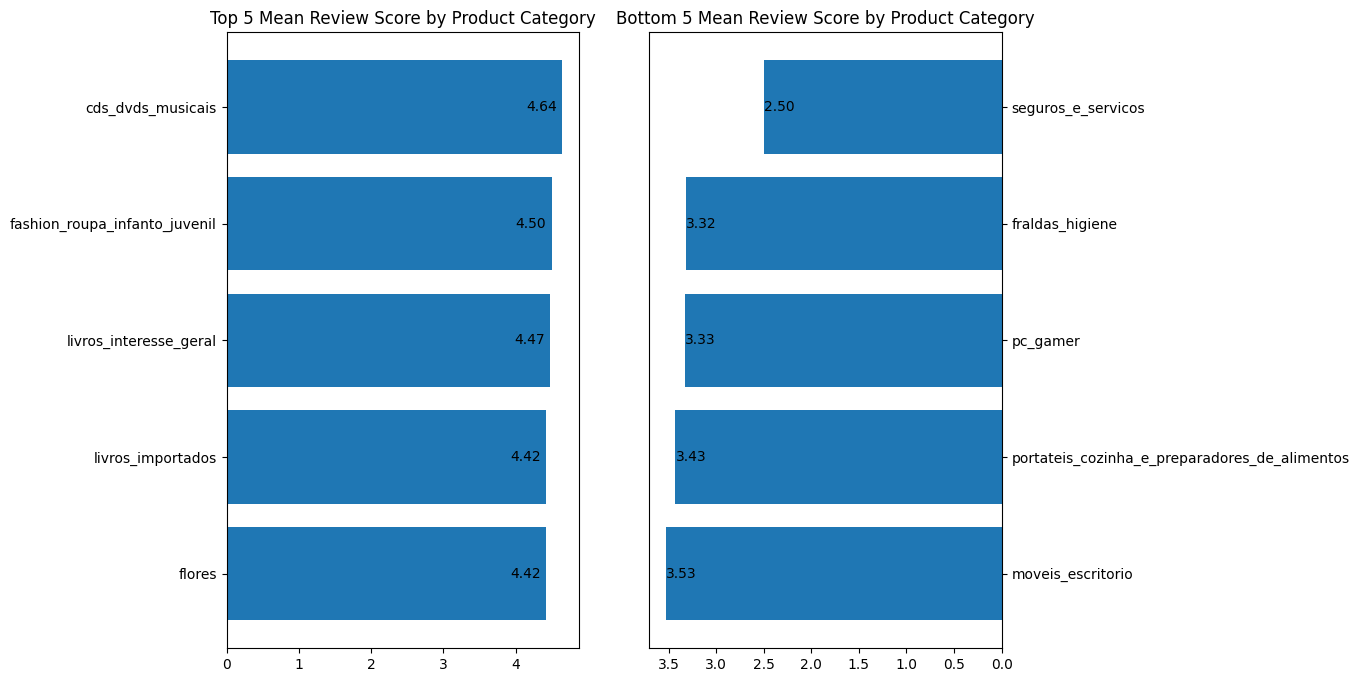

,review_score,order_item_id
product_category_name,,
cama_mesa_banho,3.893229,11970
beleza_saude,4.147112,9989
esporte_lazer,4.122596,8952
moveis_decoracao,3.924190,8794
informatica_acessorios,3.950378,8104
...,...,...
cds_dvds_musicais,4.642857,14
portateis_cozinha_e_preparadores_de_alimentos,3.428571,14
pc_gamer,3.333333,9


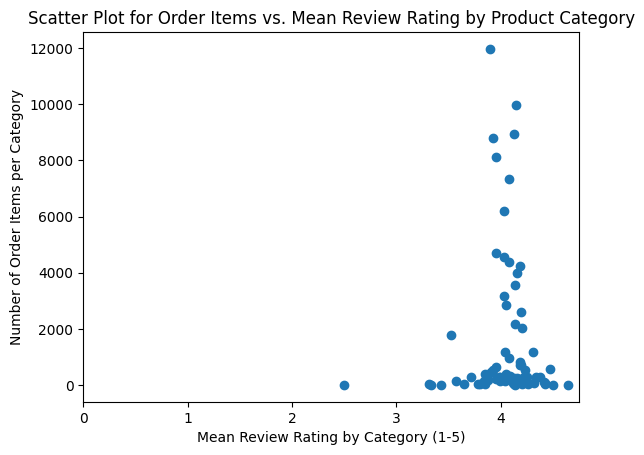

,review_score,order_item_id
review_score,1.000000,-0.004566
order_item_id,-0.004566,1.000000


rata-rata nilai ulasan dari top 5 pemesanan tertinggi: product_category_name
cama_mesa_banho           3.893229
beleza_saude              4.147112
esporte_lazer             4.122596
moveis_decoracao          3.924190
informatica_acessorios    3.950378
Name: review_score, dtype: float64
rata-rata nilai ulasan dari top 5 pemesanan terendah: product_category_name
cds_dvds_musicais                                4.642857
portateis_cozinha_e_preparadores_de_alimentos    3.428571
pc_gamer                                         3.333333
fashion_roupa_infanto_juvenil                    4.500000
seguros_e_servicos                               2.500000
Name: review_score, dtype: float64


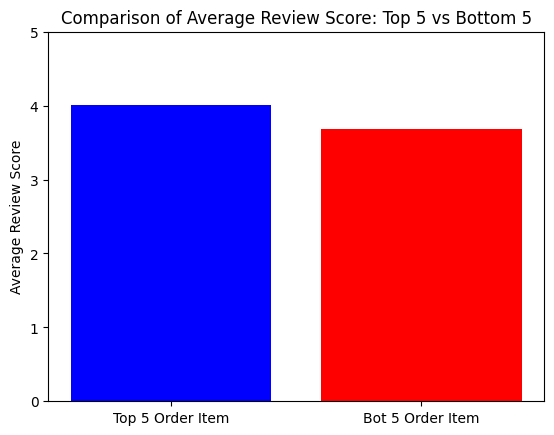

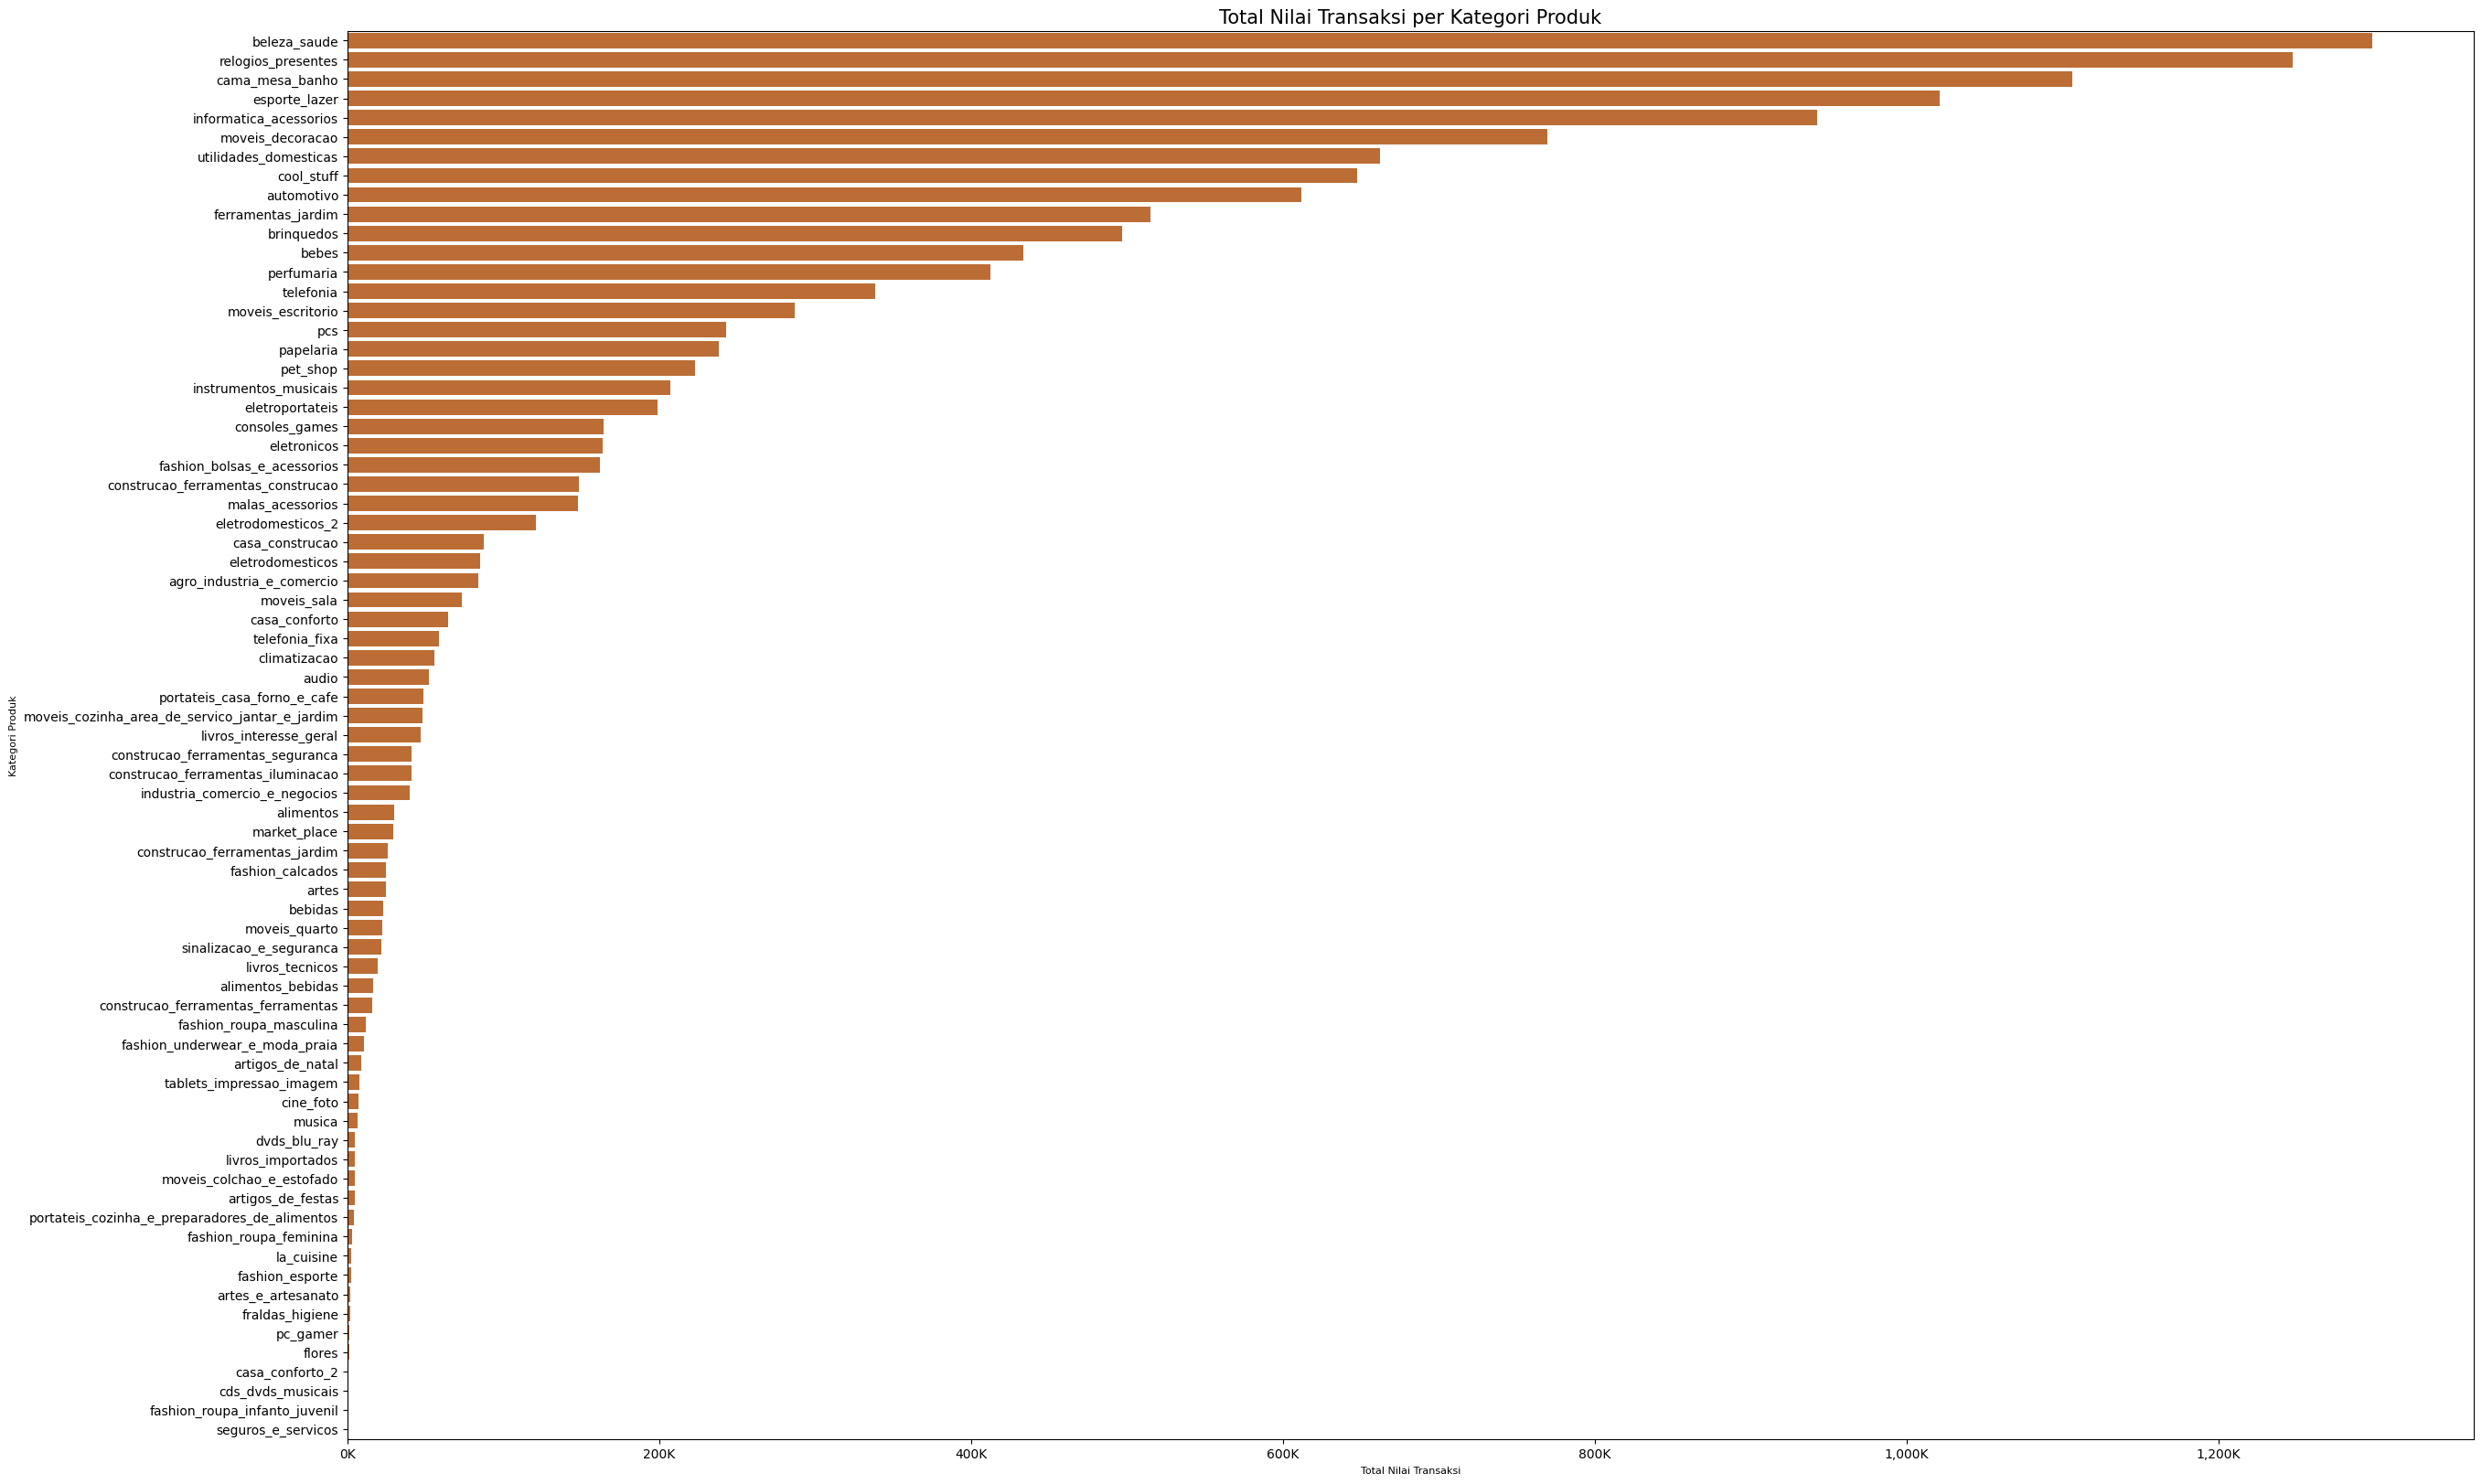

,price,order_item_id
product_category_name,,
beleza_saude,1298651.50,9989
relogios_presentes,1247502.48,6192
cama_mesa_banho,1106224.47,11970
esporte_lazer,1021259.93,8952
informatica_acessorios,942421.39,8104
moveis_decoracao,769637.12,8794
utilidades_domesticas,662175.18,7321
cool_stuff,647467.77,3981
automotivo,611974.82,4367


In [42]:
# melihat nilai ulasan per kategori produk terhadap jumlah pembeliannya
total_order_by_category = all_df.groupby('product_category_name').agg({
    'review_score':'mean',
    'order_item_id':'count'
}).sort_values(by='order_item_id',ascending=False)

mean_review_by_category = all_df.groupby('product_category_name').agg({
    'review_score':'mean',
    'order_item_id':'count'
}).sort_values(by='review_score',ascending=False)

category_price = all_df.groupby('product_category_name').agg({
    'price':'sum',
    'order_item_id':'count'
}).sort_values(by='price',ascending=False)

# 5 produk yang memiliki rata-rata ulasan tertinggi dan tertendah
fig, ax = plt.subplots(1,2,figsize=(10,8))
top_5_mean_review_category = mean_review_by_category['review_score'].head().sort_values(ascending=True)
bot_5_mean_review_category = mean_review_by_category['review_score'].tail()

ax[0].barh(top_5_mean_review_category.index, top_5_mean_review_category)
ax[0].set_title('Top 5 Mean Review Score by Product Category')
for i in range(len(top_5_mean_review_category)):
    ax[0].text(top_5_mean_review_category[i] - 0.5, i, f'{top_5_mean_review_category[i]:.2f}', va='center')

ax[1].barh(bot_5_mean_review_category.index, bot_5_mean_review_category)
ax[1].set_title('Bottom 5 Mean Review Score by Product Category')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
for i in range(len(bot_5_mean_review_category)):
    ax[1].text(bot_5_mean_review_category[i], i, f'{bot_5_mean_review_category[i]:.2f}', va='center')

plt.show()

display(total_order_by_category)
plt.scatter('review_score','order_item_id',data=total_order_by_category)
plt.xlabel('Mean Review Rating by Category (1-5)')
plt.ylabel('Number of Order Items per Category')
plt.xlim(left=0)
plt.title('Scatter Plot for Order Items vs. Mean Review Rating by Product Category')
plt.show()

# melihat korelasi antara nilai ulasan terhadap jumlah pembelian barang
display(total_order_by_category[['review_score','order_item_id']].corr(method='spearman'))

# rata-rata nilai ulasan 5 kategori produk nama teratas berdasarkan order_item_id terbanyak
top_5_review_score = total_order_by_category['review_score'].head()
bot_5_review_score = total_order_by_category['review_score'].tail()
average_score = [top_5_review_score.mean(),bot_5_review_score.mean()]
category = ['Top 5 Order Item','Bot 5 Order Item']
print(f"rata-rata nilai ulasan dari top 5 pemesanan tertinggi: {top_5_review_score}\nrata-rata nilai ulasan dari top 5 pemesanan terendah: {bot_5_review_score}")

plt.bar(category,average_score,color=['blue','red'])
plt.ylabel('Average Review Score')
plt.ylim(top=5)
plt.title('Comparison of Average Review Score: Top 5 vs Bottom 5')
plt.show()

plt.figure(figsize=(30,20))
barplot_category = sns.barplot(x='price',y='product_category_name',data=category_price,color='chocolate')
plt.title('Total Nilai Transaksi per Kategori Produk',fontsize=15)
plt.xlabel('Total Nilai Transaksi',fontsize=8)
# mengubah satuan sumbu x
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-3:,.0f}K'))

plt.ylabel('Kategori Produk',fontsize=8)
plt.show()
display(category_price.head(10))


In [43]:
#membuat variabel recency, frequency, dan monetary (rfm)
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id":"nunique", # berapa banyak jumlah transaksi yang dilakukan
    "price":"sum", #jumlah uang yang dihabiskan seorang customer
    "review_score":"mean" #mengambil nilai rata-rata dari nilai ulasan yang diberikan
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary", "mean_review_score"]

#menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.sort_values(by="frequency",ascending=False).head(10)

,customer_id,frequency,monetary,mean_review_score,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.8,1.0,293
65467,aa58e9d75d589687cbb79699e5118e5e,1,399.0,4.0,222
65476,aa5e341090958e5111abe3ba75bcfe87,1,82.0,2.0,171
65475,aa5e0a0c36015d39de864189a2b00b09,1,76.0,3.0,20
65474,aa5dfb0872b3828aa250acb54d387266,1,219.9,5.0,458
65473,aa5de1c726fedb2c495cea4ead03d6d8,1,63.9,3.0,348
65472,aa5d81c64ac61c8124eb6c249c2c2ca5,1,110.0,4.0,357
65471,aa5c0aaed0105f447bd7e6198ae88108,1,103.0,4.0,10
65470,aa5b7785199c225fb6938bf1372d6026,1,34.0,5.0,262
65469,aa5ab3effa79f3f9d5473b9dad8ce94b,1,80.0,5.0,251


**Insight**
- **review_score** dan **order_item_id** berdasarkan kategori produk memiliki hubungan yang positif namun tidak terlalu kuat
- Scatter plot menunjukkan bahwa titik kebanyakan mengumpul pada nilai ulasan yang tinggi (sekitar nilai 4). Ini berarti pemesanan barang lebih banyak dilakukan pada kategori produk yang memiliki sebaran tingkat ulasan 4. Total pesanan terbanyak (11k order) ada pada kategori produk **cama_mesa_banho** dengan rata-rata nilai ulasan 3.89. Sedangkan ulasan terendah (rating 2.5) hanya memiliki jumlah pesanan sebanyak 2 pesanan. Ini juga dapat menegaskan bahwa rata-rata per kategori produk yang dijual oleh toko dinilai cukup memuaskan oleh konsumen.
- Dari bar plot dibawah, terlihat bahwa perbandingan rata-rata nilai antara 5 kategori produk dengan pemesanan terbanyak dan paling sedikit selisihnya tidak terlalu beda jauh (4 vs 3,6). Disini terlihat bahwa pengaruh rating produk hanya sedikit mempengaruhi jumlah pemesanan kategori produk
- Sayangnya, kita tidak bisa melihat apakah pemberian penilaian ulasan seorang konsumen mempengaruhi pembeliannya di masa depan karena berdasarkan nilai frequency yang dihasilkan oleh rfm_df, terlihat nilai tertinggi adalah 1, yang berarti kasusnya disini setiap konsumen yang berbeda hanya pernah melakukan transaksi paling banyak sebesar 1 kali
- Rata-rata penilaian ulasan tertinggi dipegang oleh kategori **cds_dvds_musicals** dengan nilai 4.64. Sedangkan **seguro_e_servicos** berada pada peringkat paling bawah dengan rata-rata ulasan 2.5
- Kategori produk dengan jumlah nilai pemesanan tertinggi dipegang oleh **beleza_saude** dengan nilai mencapai $1.2M diikuti dengan **relogios_presentes** dengan nilai $1.1M

### Pertanyaan 2: Daerah apa saja yang paling banyak melakukan pemesanan produk selama satu tahun terakhir (Geospatial analysis)?

In [44]:
# Untuk menjawab pertanyaan ini, kita perlu customer_city, customer_state, order_item_id.
all_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dif_delivered_purchase_date,dif_delivered_carrier_date,reviewed,review_id,review_score,review_answer_timestamp,dif_review_delivered_date,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,39801.0,teofilo otoni,MG,Active,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,14.0,7.0,Yes,4ce650e117a5b292bf5ea980a61eb61e,1.0,2018-05-15 23:38:00,6.0,af74cc53dcffc8384b29e7abfa41902b,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0,1.0,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,2422.0,sao paulo,SP,Active,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,3.0,2.0,Yes,ad2036caca61484fc435d7e673c020f2,5.0,2018-07-03 11:23:16,4.0,a630cc320a8c872f9de830cf121661a3,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,1.0,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,6f70c0b2f7552832ba46eb57b1c5651e,2652.0,sao paulo,SP,Active,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,6.0,3.0,Yes,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,2017-12-22 17:55:30,4.0,2028bf1b01cafb2d2b1901fca4083222,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,1.0,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,36060.0,juiz de fora,MG,Active,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,15.0,1.0,Yes,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,2017-12-21 21:42:31,1.0,548e5bfe28edceab6b51fa707cc9556f,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,1.0,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,36060.0,juiz de fora,MG,Active,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,15.0,1.0,Yes,5bc7680443b4ef765fec11a8201eeb0c,5.0,2017-12-22 01:10:39,1.0,548e5bfe28edceab6b51fa707cc9556f,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,1.0,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88


In [45]:
# keseluruhan data
geo_order_df = all_df.groupby(['customer_state']).agg({
    'customer_id':'nunique',
    'order_item_id':'sum',
    'price':'sum',
    'freight_value':'sum',
})

# berdasarkan data tahun terbaru (tahun 2018)
recent_year = all_df['order_purchase_timestamp'].dt.year.max()
recent_year_df = all_df[all_df['order_purchase_timestamp'].dt.year == recent_year]
recent_year_df.head()

geo_order_recent_df = recent_year_df.groupby(['customer_state']).agg({
    'customer_id':'nunique',
    'order_item_id':'sum',
    'price':'sum',
    'freight_value':'sum',
    'order_purchase_timestamp':'min'
})


In [46]:
# test visualisasi menggunakan geopandas
brazil_states = gpd.read_file('C:/Users/DELL/OneDrive/Dokumen/Frodewin/submission-dicoding-analysis_python/geopandas-brasil/shapes/gadm36_BRA_1.shp')

# ubah kode HASC_1 mengikuti kode dalam CRPOI_df
brazil_states['HASC_1'] = brazil_states['HASC_1'].str[-2:]

# cek apakah kode sudah sama antar dataframe
brazil_states['HASC_1'].unique()
all_df['customer_state'].unique()

# merge antara geo_order_df dengan brazil_states untuk mendapatkan nilai koordinat agar bisa menghitung order_item_id berdasarkan state
merged_geo_order_df = pd.merge(
    left=geo_order_df,
    right=brazil_states,
    how='left',
    left_on='customer_state',
    right_on='HASC_1'
)

# berdasarkan tahun terkini (2018)
merged_geo_order_recent_df = pd.merge(
    left=geo_order_recent_df,
    right=brazil_states,
    how='left',
    left_on='customer_state',
    right_on='HASC_1'
)

display(merged_geo_order_df)

,customer_id,order_item_id,price,freight_value,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,81,116.0,16992.54,3741.62,BRA,Brazil,BRA.1_1,Acre,None,None,Estado,State,None,AC,"POLYGON ((-68.10553 -10.72192, -68.10547 -10.7..."
1,411,506.0,82739.34,16351.92,BRA,Brazil,BRA.2_1,Alagoas,None,None,Estado,State,None,AL,"MULTIPOLYGON (((-35.88986 -9.84431, -35.88986 ..."
2,147,199.0,22323.46,5586.92,BRA,Brazil,BRA.4_1,Amazonas,Amazone,None,Estado,State,None,AM,"POLYGON ((-58.13699 -7.35614, -58.13682 -7.356..."
3,68,105.0,13654.30,2863.09,BRA,Brazil,BRA.3_1,Amapá,None,None,Estado,State,None,AP,"MULTIPOLYGON (((-50.8257 2.52208, -50.8257 2.5..."
4,3344,4662.0,528132.08,103723.78,BRA,Brazil,BRA.5_1,Bahia,Ba¡a,None,Estado,State,None,BA,"MULTIPOLYGON (((-38.69208 -17.95958, -38.69208..."
5,1323,1780.0,235557.81,49921.71,BRA,Brazil,BRA.6_1,Ceará,None,None,Estado,State,None,CE,"MULTIPOLYGON (((-40.83181 -2.88125, -40.83181 ..."
6,2121,2873.0,310702.99,51888.75,BRA,Brazil,BRA.7_1,Distrito Federal,None,None,Distrito Federal,Federal District,None,DF,"POLYGON ((-47.93915 -16.05135, -48.0211 -16.05..."
7,2018,2655.0,281318.75,51093.40,BRA,Brazil,BRA.8_1,Espírito Santo,Espiritu Santo,None,Estado,State,None,ES,"MULTIPOLYGON (((-40.88403 -21.16125, -40.88403..."
8,1998,3187.0,297387.27,54263.85,BRA,Brazil,BRA.9_1,Goiás,Goiáz|Goyáz,None,Estado,State,None,GO,"POLYGON ((-49.0048 -18.53718, -49.01248 -18.53..."
9,736,964.0,121120.15,31949.32,BRA,Brazil,BRA.10_1,Maranhão,São Luíz de Maranhão,None,Estado,State,None,MA,"MULTIPOLYGON (((-44.54986 -1.88458, -44.54986 ..."


C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\757861031.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(top_5_states.geometry.centroid.x,
C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\757861031.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  top_5_states.geometry.centroid.y,
C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\757861031.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(top_5_states.geometry.centroid.x,
C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\757861031.py:23: UserWarning: Geometry is in a g

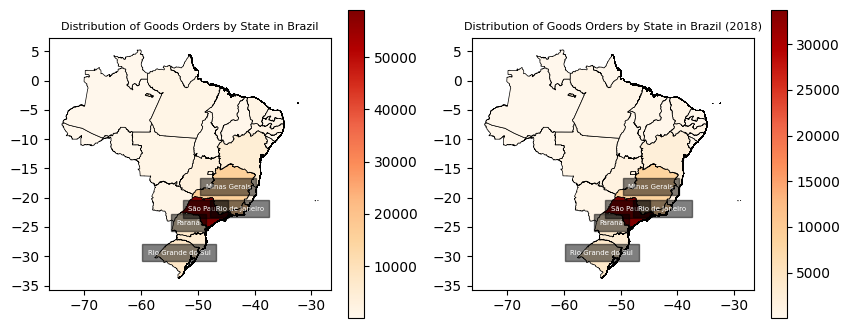

C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\757861031.py:40: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label, value in zip(top_5_states.geometry.centroid.x,
C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\757861031.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  top_5_states.geometry.centroid.y,
C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\757861031.py:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label, value in zip(top_5_recent_states.geometry.centroid.x,
C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\757861031.py:50: UserWarnin

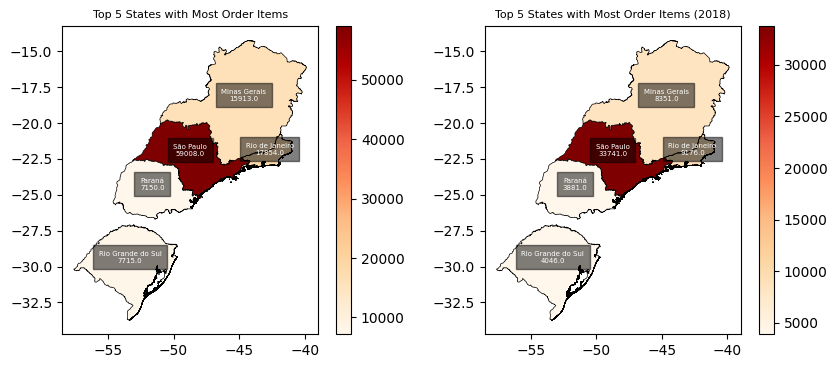

In [47]:
# Anggap gdf yang telah di-merge adalah GeoDataFrame dengan informasi geometris dan pesanan
gdf_plot = gpd.GeoDataFrame(merged_geo_order_df, geometry='geometry')
gdf_recent_plot = gpd.GeoDataFrame(merged_geo_order_recent_df, geometry='geometry')

#menambahkan keterangan 5 state yang memiliki order_item_id terbanyak
top_5_states = gdf_plot.nlargest(5, 'order_item_id')
top_5_recent_states = gdf_recent_plot.nlargest(5, 'order_item_id')

# Plot berdasarkan jumlah pesanan (order_item_id) per state
fig, ax = plt.subplots(1,2, figsize=(10,4))

gdf_plot.plot(column='order_item_id', legend=True, cmap='OrRd', ax=ax[0], edgecolor='black',linewidth=0.5)
for x, y, label in zip(top_5_states.geometry.centroid.x, 
                        top_5_states.geometry.centroid.y, 
                        top_5_states['NAME_1']):
    ax[0].text(x, y, f'{label}', fontsize=5, ha='center', color='white',
            bbox=dict(facecolor='black', alpha=0.5))
    
ax[0].set_title('Distribution of Goods Orders by State in Brazil', fontsize=8)

gdf_recent_plot.plot(column='order_item_id', legend=True, cmap='OrRd', ax=ax[1], edgecolor='black',linewidth=0.5)
for x, y, label in zip(top_5_states.geometry.centroid.x, 
                              top_5_states.geometry.centroid.y, 
                              top_5_states['NAME_1']):
    ax[1].text(x, y, f'{label}', fontsize=5, ha='center', color='white',
            bbox=dict(facecolor='black', alpha=0.5))

ax[1].set_title('Distribution of Goods Orders by State in Brazil (2018)', fontsize=8)
plt.show()

# Membuat plot untuk 5 state dengan jumlah order terbanyak
fig2, ax2 = plt.subplots(1, 2, figsize=(10, 4))

# Plot negara bagian dengan jumlah order terbanyak
top_5_states.plot(column='order_item_id', cmap='OrRd', linewidth=0.5, ax=ax2[0], edgecolor='black', legend=True)
top_5_recent_states.plot(column='order_item_id', cmap='OrRd', linewidth=0.5, ax=ax2[1], edgecolor='black', legend=True)

## Menambahkan nama state dan nilai order pada plot
# seluruh data
for x, y, label, value in zip(top_5_states.geometry.centroid.x, 
                              top_5_states.geometry.centroid.y, 
                              top_5_states['NAME_1'], 
                              top_5_states['order_item_id']):
    ax2[0].text(x, y, f'{label}\n{value}', fontsize=5, ha='center', color='white',
             bbox=dict(facecolor='black', alpha=0.5))
ax2[0].set_title('Top 5 States with Most Order Items', fontsize=8)

# berdasarkan tahun 2018
for x, y, label, value in zip(top_5_recent_states.geometry.centroid.x, 
                              top_5_recent_states.geometry.centroid.y, 
                              top_5_recent_states['NAME_1'], 
                              top_5_recent_states['order_item_id']):
    ax2[1].text(x, y, f'{label}\n{value}', fontsize=5, ha='center', color='white',
             bbox=dict(facecolor='black', alpha=0.5))
ax2[1].set_title('Top 5 States with Most Order Items (2018)', fontsize=8)

plt.show()

**Insight:**
- Dari hasil pemetaan diatas pada seluruh observasi yang berada di database, terlihat bahwa sebaran pemesanan barang dari 26 negara bagian terbanyak berada di bagian tenggara Brasil, terlihat bahwa negara bagian Sao Paulo menduduki peringkat pertama dengan jumlah pemesanan barang terbanyak (56k order) diikuti dengan Rio De Janeiro (17k order), dan Minas Gerais (15k order) 
- Sedangkan, berdasarkan penjualan tahun terkini (2018), terlihat negara bagian Sao Paulo masih menduduki peringkat pertama dengan total 32k pemesanan, diikuti dengan Rio De Janeiro (8.7k order), dan Minas Gerais (8.1k order)


### Pertanyaan 3: Bagaimana Pengaruh Lama Pengiriman dengan Penilaian Produk?

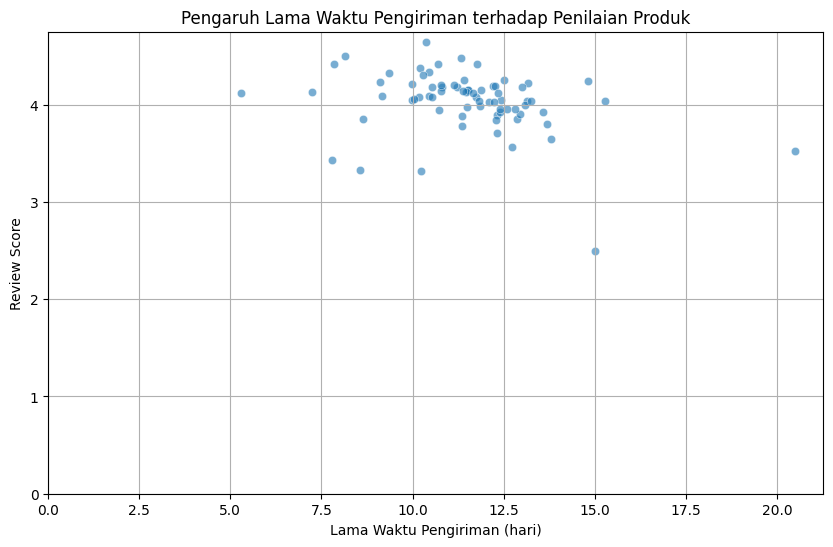

In [48]:
all_df['shipping_time'] = (all_df['order_delivered_customer_date'] - all_df['order_purchase_timestamp']).dt.days

# kelompokan berdasarkan kota konsumen
shipping_by_category = all_df.groupby('product_category_name').agg({
    'review_score':'mean',
    'order_item_id':'count',
    'shipping_time':'mean'
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=shipping_by_category, x='shipping_time', y='review_score', alpha=0.6)
plt.title('Pengaruh Lama Waktu Pengiriman terhadap Penilaian Produk')
plt.xlabel('Lama Waktu Pengiriman (hari)')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.ylabel('Review Score')
plt.grid()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8100\1339184263.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shipping_vs_review = all_df.groupby(['shipping_time_bins', 'review_score']).agg({


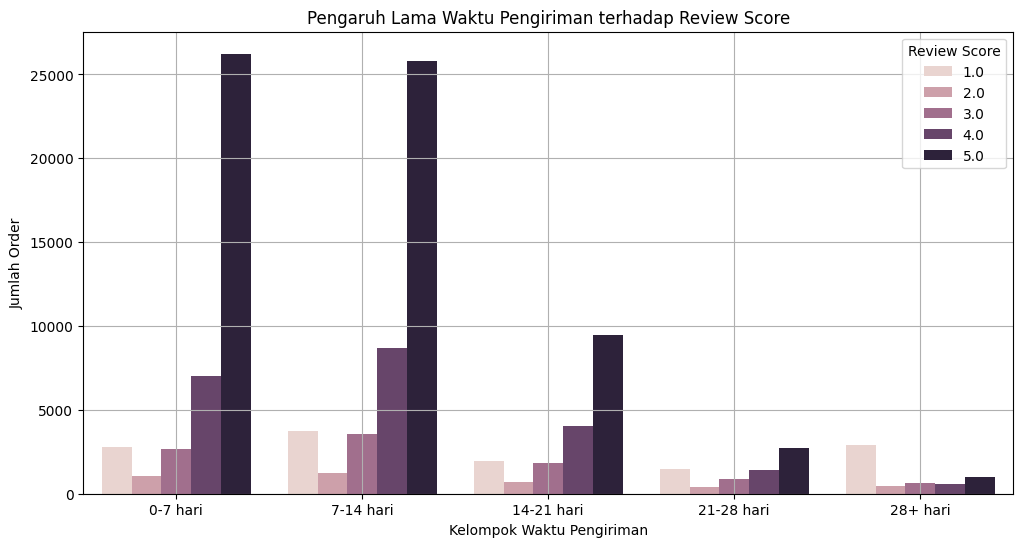

,shipping_time,review_score
shipping_time,1.000000,-0.220477
review_score,-0.220477,1.000000


In [49]:
bins = [0, 7, 14, 21, 28, all_df['shipping_time'].max()]
labels = ['0-7 hari', '7-14 hari', '14-21 hari', '21-28 hari', '28+ hari']

all_df['shipping_time_bins'] = pd.cut(all_df['shipping_time'], bins=bins, labels=labels, include_lowest=True)

shipping_vs_review = all_df.groupby(['shipping_time_bins', 'review_score']).agg({
    'order_item_id': 'count'
}).reset_index()

shipping_vs_review_pivot = shipping_vs_review.pivot(index='shipping_time_bins', columns='review_score', values='order_item_id').fillna(0)

plt.figure(figsize=(12, 6))
sns.barplot(x='shipping_time_bins', y='order_item_id', hue='review_score', data=shipping_vs_review)
plt.title('Pengaruh Lama Waktu Pengiriman terhadap Review Score')
plt.xlabel('Kelompok Waktu Pengiriman')
plt.ylabel('Jumlah Order')
plt.legend(title='Review Score')
plt.grid()
plt.show()

# melihat korelasi antara lama waktu pengiriman dan waktu penilaian menggunakan spearman (karena data tidak berbentuk distribusi normal)
all_df[['shipping_time','review_score']].corr(method='spearman')

**Insight**
- Berdasarkan hasil visualisasi *scatter plot* pengelompokan **product_category_name** terlihat bahwa terlihat ada sedikit tren penurunan dari penilaian ulasan ketika lama waktu pengiriman semakin lama. Namun, rata-rata titik sebagian besar mengumpul di penilaian 4 dengan rentang lama waktu pengiriman dari hari 5-15. Terlihat ada satu nilai outlier dengan pengiriman rata-rata diatas 20 hari
- Ini juga terlihat dalam bar plot yang menunjukkan **rating 5** semakin menurun ketika waktu pengiriman melebihi dari 14 hari, Hal ini menunjukkan bahwa ada hubungan negatif antara lama waktu pengiriman terhadap pemberian rating oleh konsumen. Rating 1 tertinggi berada pada kelompok lama waktu pengiriam 7-14 hari dengan total sebanyak **3556 konsumen**.
- Menggunakan korelasi spearman, terlihat bahwa nilai korelasi memiliki nilai **-0.22** yang berarti hubungan bersifat negatif namun tidak terlalu kuat.

### Pertanyaan 4: Tipe pembayaran apa yang paling banyak digunakan oleh pelanggan dalam melakukan transaksi?

,payment_type,order_item_id
0,boleto,22607
1,credit_card,85580
2,debit_card,1664
3,not_defined,0
4,voucher,6185


2788

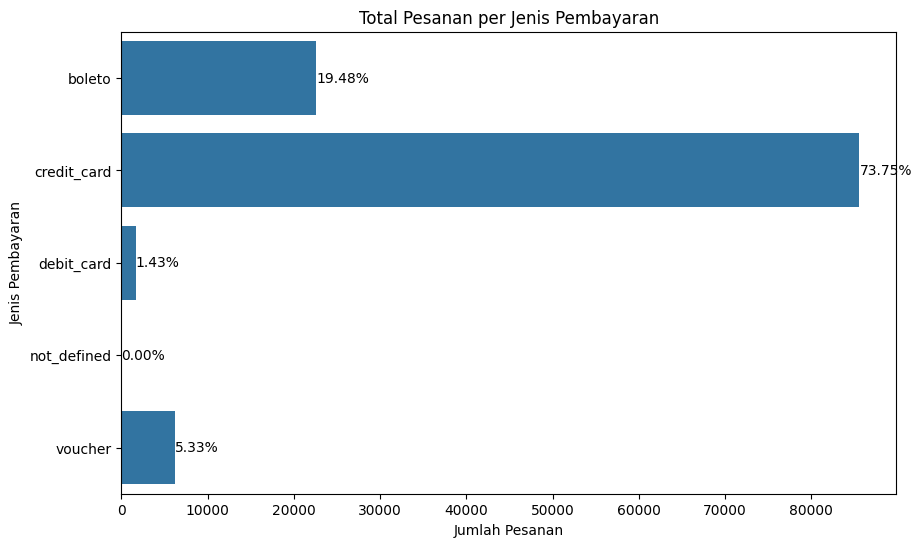

In [50]:
# kelompok berdasarkan tipe pembayaran yang paling diminati berdasarkan barang pesanan
total_orders = all_df['order_item_id'].count()
payment_counts = all_df.groupby('payment_type')['order_item_id'].count().reset_index()

# melihat data hilang
display(payment_counts)
display(all_df['order_item_id'].isna().sum())
all_df['payment_type'].value_counts()

## ada total 830 data hilang -> 517 missing (credit), 170 missing (boleto), 7 missing (debit), 133 missing (voucher), 3 missing (not defined)
payment_counts['percentage'] = (payment_counts['order_item_id'] / total_orders) * 100

# barplot melihat total tipe pembelian paling diminati dari jumlah total pemesanan barang per item
plt.figure(figsize=(10,6))
barplot = sns.barplot(x='order_item_id',y='payment_type',data=payment_counts)
plt.title('Total Pesanan per Jenis Pembayaran')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Jenis Pembayaran')

# Menambahkan label persentase di atas bar
for index, row in payment_counts.iterrows():
    barplot.text(row['order_item_id'], index, f"{row['percentage']:.2f}%", color='black', ha="left", va="center")



In [51]:
# merge data melihat tipe pembayaran yang paling diminati berdasarkan transaksi
all_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dif_delivered_purchase_date,dif_delivered_carrier_date,reviewed,review_id,review_score,review_answer_timestamp,dif_review_delivered_date,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value,shipping_time,shipping_time_bins
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,39801.0,teofilo otoni,MG,Active,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,14.0,7.0,Yes,4ce650e117a5b292bf5ea980a61eb61e,1.0,2018-05-15 23:38:00,6.0,af74cc53dcffc8384b29e7abfa41902b,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0,1.0,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,13.0,7-14 hari
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,2422.0,sao paulo,SP,Active,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,3.0,2.0,Yes,ad2036caca61484fc435d7e673c020f2,5.0,2018-07-03 11:23:16,4.0,a630cc320a8c872f9de830cf121661a3,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,1.0,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,3.0,0-7 hari
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,6f70c0b2f7552832ba46eb57b1c5651e,2652.0,sao paulo,SP,Active,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,6.0,3.0,Yes,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,2017-12-22 17:55:30,4.0,2028bf1b01cafb2d2b1901fca4083222,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,1.0,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,6.0,0-7 hari
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,36060.0,juiz de fora,MG,Active,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,15.0,1.0,Yes,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,2017-12-21 21:42:31,1.0,548e5bfe28edceab6b51fa707cc9556f,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,1.0,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,14.0,7-14 hari
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,36060.0,juiz de fora,MG,Active,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,15.0,1.0,Yes,5bc7680443b4ef765fec11a8201eeb0c,5.0,2017-12-22 01:10:39,1.0,548e5bfe28edceab6b51fa707cc9556f,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,1.0,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,14.0,7-14 hari


,payment_type,customer_id,percentage
0,boleto,19539,19.895933
1,credit_card,75618,76.999369
2,debit_card,1515,1.542676
3,not_defined,0,0.000000
4,voucher,3745,3.813413


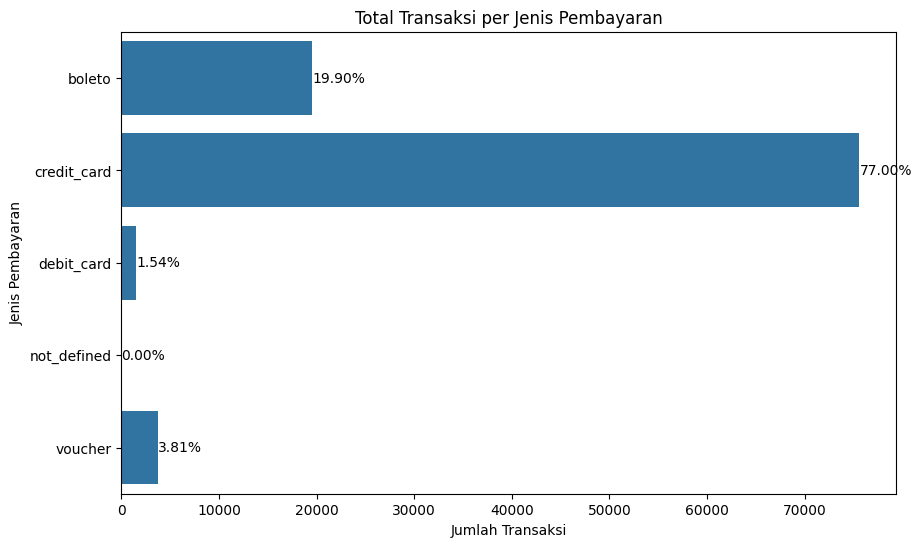

In [52]:
# merge data melihat tipe pembayaran yang paling diminati berdasarkan transaksi

total_transactions = all_df['customer_id'].nunique()
payment_counts_type = all_df.groupby('payment_type')['customer_id'].nunique().reset_index()

payment_counts_type['percentage'] = (payment_counts_type['customer_id'] / total_transactions) * 100

display(payment_counts_type)

plt.figure(figsize=(10,6))
barplot2 = sns.barplot(x='customer_id',y='payment_type',data=payment_counts_type)
plt.title('Total Transaksi per Jenis Pembayaran')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Jenis Pembayaran')

# Menambahkan label persentase di atas bar
for index, row in payment_counts_type.iterrows():
    barplot2.text(row['customer_id'], index, f"{row['percentage']:.2f}%", color='black', ha="left", va="center")


**Insight**
- Terlihat bahwa kebanyakan konsumen menggunakan pembayaran **credit_card** untuk melakukan transaksi (mencapai >80k atau sekitar 73.78%) dari 118.5k pemesanan. Paling rendah adalah tipe debit (tidak termasuk not_defined) dengan persentase hanya 1.44%
- Dari total transaksi juga menunjukkan tipe pembayaran **credit_card** menempati urutan pertama, yaitu 77% dari total semua transaksi berdasarkan **customer_id** unique. Sedangkan terendah masih dipegang oleh **debit_card** dengan persentase 1.54% dari seluruh transaksi.

### Pertanyaan 5: Tipe pembayaran mana yang menghasilkan total nilai pesanan tertinggi dari pelanggan?

,price,order_item_id,customer_id,percentage
payment_type,,,,
boleto,2357526.87,28294.0,19539,16.864663
credit_card,10797299.29,101611.0,75618,77.238915
debit_card,179119.40,1924.0,1515,1.281338
not_defined,0.00,0.0,0,0.000000
voucher,645146.89,7007.0,3745,4.615084


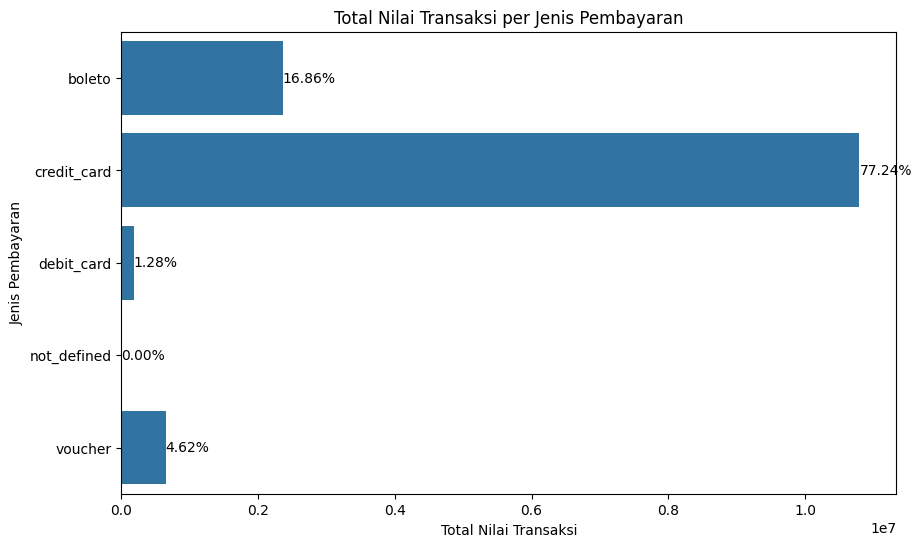

In [53]:
order_payment_price = all_df.groupby("payment_type").agg({
    "price":"sum",
    "order_item_id":"sum",
    "customer_id":"nunique"
})

total_price = all_df['price'].sum()
order_payment_price['percentage'] = (order_payment_price['price'] / total_price) * 100

plt.figure(figsize=(10,6))
barplot_order = sns.barplot(x='price',y='payment_type',data=order_payment_price)
plt.title('Total Nilai Transaksi per Jenis Pembayaran')
plt.xlabel('Total Nilai Transaksi')
plt.ylabel('Jenis Pembayaran')

# Menambahkan label persentase di atas bar
for index, row in order_payment_price.iterrows():
    barplot_order.text(row['price'], index, f"{row['percentage']:.2f}%", color='black', ha="left", va="center")

order_payment_price # 13.979.092.5

**Insight**
- Berdasarkan jumlah nilai pesanan, terlihat bahwa tipe pembayaran **credit_card** menempati posisi pertama dengan menguasai 77% dari total pesanan dengan nilai $10.8m. Diikuti dengan boletto, voucher, dan debit_card. 
- Tipe data **not_defined** terlihat tidak tercatat memiliki nilai pemesanan. Ini mungkin terjadi karena konsumen belum menentukan transaksi pembayaran, tetapi sudah melakukan pemesanan terlebih dahulu (status: belum bayar).

## Conclusion

- Pertanyaan 1: Tidak terlihat hubungan yang kuat antara penilaian produk terhadap pemesanannya. Hal ini bisa terjadi karena data yang terdapat dalam E-commerce database ini secara kebetulan mencatat pemesanan konsumen hanya pernah melakukan satu kali per konsumen. Hasil data hanya menunjukkan pembelian yang dilakukan oleh konsumen pertama dan terakhir hanya satu-satunya pada pesanan tersebut. Sehingga, kita tidak bisa melihat perilaku konsumen untuk membeli barang berikutnya (dibuktikan dari nilai tertinggi frequency dalam rfm adalah 1 dan perbedaan rata-rata nilai ulasan antara 5 teratas dan 5 terendah tidak terlalu jauh).  Rata-rata konsumen memberi penilaian ulasan pada rentang rata-rata 4 baik untuk penilaian individu maupun per kelompok kategori produk dengan kategori produk yang memiliki nilai ulasan tertinggi adalah **cds_dvds_musicals**

- Pertanyaan 2: Daerah yang paling banyak melakukan pemesanan adalah negara bagian Sao Paulo (56k order) diikuti dengan Rio De Janeiro (17k order), dan Minas Gerais (15k order), baik pada perhitungan keseluruhan pada database, maupun khusus pada tahun paling terkini (2018)

- Pertanyaan 3: Terdeteksi menggunakan korelasi spearman, terlihat ada korelasi negatif kecil antara penilaian produk terhadap lama waktu pengiriman, menyatakan bahwa hubungan mereka saling bertentangan. Jika lama waktu semakin besar, maka penilaian akan semakin kecil dsb. Dalam bar plot juga terlihat bahwa proporsi konsumen memberikan ulasan 5 semakin kecil seiring penambahan lama waktu pengiriman dan penilaian 1 juga menjadi terbesar kedua ketika menyentuh pengiriman diatas 30 hari. Ini berarti bahwa adanya pengaruh lama waktu terhadap ulasan penilaian

- Pertanyaan 4: Tipe Pembayaran yang paling banyak digunakan adalah **credit_card** dengan persentase 73% dari total jumlah barang pesanan konsumen dan 77% dari total transaksi. Sedangkan, **debit_card** menempati tipe pembayaran terendah, dengan persentase 1.44% dan 1.54% untuk jumlah barang pesanan dan total transaksi.

- Pertanyaan 5: Sama dengan jawaban pertanyaan 4, disini juga terlihat bahwa tipe pembayaran **credit_card** menunjukkan posisi pertama dalam total nilai pembayaran dengan jumlah $10.8m (77%). Dan yang paling rendah juga adalah tipe pembayaran **debit_card** dengan nilai $179k (1.28%)